<a href="https://colab.research.google.com/github/seemapr22/Travel_Package_Purchase_Prediction/blob/main/Travel_Package_Purchase_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')   # to supress the warnings

# --Sklearn library--

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier                           # to build the model
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier   # to build the model
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#AUC ROC
from sklearn.metrics import roc_auc_score

# **Read and Understand Data**

In [ ]:
# Read the data
df_tour=pd.read_csv('/content/drive/MyDrive/Tour Package/tour_package.csv')
df=df_tour.copy()

In [ ]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
# Understand the data
print ("Rows     : " , df.shape[0])  #get number of rows/observations
print ("Columns  : " , df.shape[1])  #get number of columns
print ("-"*50,"\n","Features : \n\n", df.columns.tolist()) #get name of columns/features
print ("-"*50,"\nMissing values :\n\n", df.isnull().sum().sort_values(ascending=False))
print( "-"*50,"\nPercent of missing :\n\n", round(df.isna().sum() / df.isna().count() * 100, 2).sort_values(ascending=False))  # looking at columns with most Missing Values

Rows     :  4888
Columns  :  20
-------------------------------------------------- 
 Features : 

 ['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']
-------------------------------------------------- 
Missing values :

 DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPer

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
# Summary of some important dataset
df[['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


**Observations**

* Minimum age of customer is 18 and Maximum age is 61 with mean 37 and median 36.
* Mean Duration of pitch is 15 mins to max of 127 mins.
* Mean Number of trips is 3 with maximum of 22.
* Average monthly income of customer is 23619 with maximum of 98678.



# **Data Preprocessing**

In [ ]:
df.drop(['CustomerID'],axis=1,inplace=True) # dropping customer ID

In [ ]:
cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact'
            ]
for i in cat_cols:
  print('Unique values in',i,'are : ')
  print(df[i].value_counts())
  print('-'*50)

Unique values in Designation are : 
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
--------------------------------------------------
Unique values in ProdTaken are : 
0    3968
1     920
Name: ProdTaken, dtype: int64
--------------------------------------------------
Unique values in OwnCar are : 
1    3032
0    1856
Name: OwnCar, dtype: int64
--------------------------------------------------
Unique values in Passport are : 
0    3466
1    1422
Name: Passport, dtype: int64
--------------------------------------------------
Unique values in CityTier are : 
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
--------------------------------------------------
Unique values in MaritalStatus are : 
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
--------------------------------------------------
Unique values in ProductPitched

**Observations**

* Single and unmarried status are not same category. Unmarried here means customers having partners.
* 920 customer had taken package last time
* Female and Fe male are same category , Data needs to be fixed.
* 3 star property is prefered by customers
* Most of the customers are from Tier1 cities.

In [ ]:
df['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [ ]:
# processing Gender status
df['Gender']=df['Gender'].apply(lambda x : 'Female' if x=='Fe Male' else x)

In [ ]:
df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [ ]:

# Converting the data type of categorical features to 'category'

cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact'
            ]
df[cat_cols] = df[cat_cols].astype('category')
df.dtypes

ProdTaken                   category
Age                          float64
TypeofContact               category
CityTier                    category
DurationOfPitch              float64
Occupation                  category
Gender                      category
NumberOfPersonVisiting         int64
NumberOfFollowups            float64
ProductPitched              category
PreferredPropertyStar        float64
MaritalStatus               category
NumberOfTrips                float64
Passport                    category
PitchSatisfactionScore         int64
OwnCar                      category
NumberOfChildrenVisiting     float64
Designation                 category
MonthlyIncome                float64
dtype: object

In [ ]:
df.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032
Designation,4888,5,Executive,1842


In [ ]:
df['Age'].describe()

count    4662.000000
mean       37.622265
std         9.316387
min        18.000000
25%        31.000000
50%        36.000000
75%        44.000000
max        61.000000
Name: Age, dtype: float64

In [ ]:
df['Agebin'] = pd.cut(df['Age'], bins = [18, 25, 31, 40, 50, 65],
                           labels = ['18-25','26-30', '31-40', '41-50', '51-65'])

In [ ]:
df['Agebin'].value_counts()

31-40    1722
41-50    1073
26-30     971
51-65     549
18-25     333
Name: Agebin, dtype: int64

In [ ]:
df['MonthlyIncome'].describe()

count     4655.000000
mean     23619.853491
std       5380.698361
min       1000.000000
25%      20346.000000
50%      22347.000000
75%      25571.000000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [ ]:
# df['Incomebin'] = pd.cut(df['MonthlyIncome'], bins = [0, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 100000], labels = ['1000-15000', '15001-20000', '20001-25000', '250001-30000','30001-35000','35001-40000','40001-45000','45001-50000','>50001'])
df['Incomebin'] = pd.cut(df['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])

In [ ]:
df['Incomebin'].value_counts()

<25000     2257
<20000     1038
<30000      768
<35000      382
<40000      206
<15000        2
<100000       2
<45000        0
<50000        0
Name: Incomebin, dtype: int64

# **Exploratory Data Analysis**

## **Univariate Analysis**

In [ ]:
# function plots a combined graph for univariate analysis of continous variable
# to check spread, central tendency , dispersion and outliers

def dist_box(data):

    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="dark")
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=15, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="teal",ax=ax_box)
    ax_box.set(xlabel='')


    # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph

    sns.distplot(data,kde=False,color='purple',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='b', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

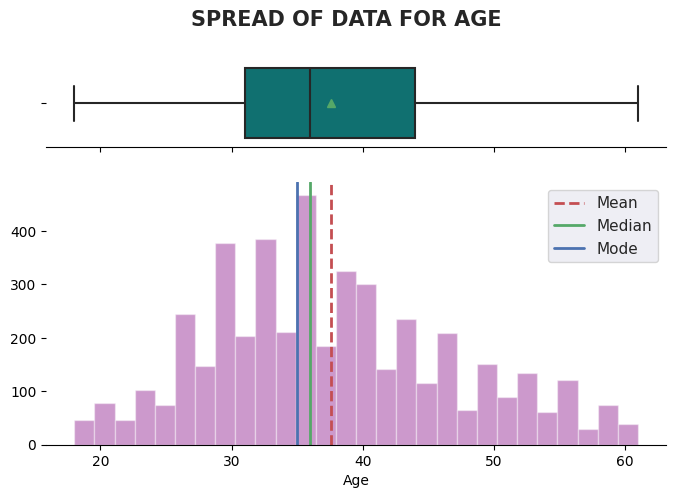

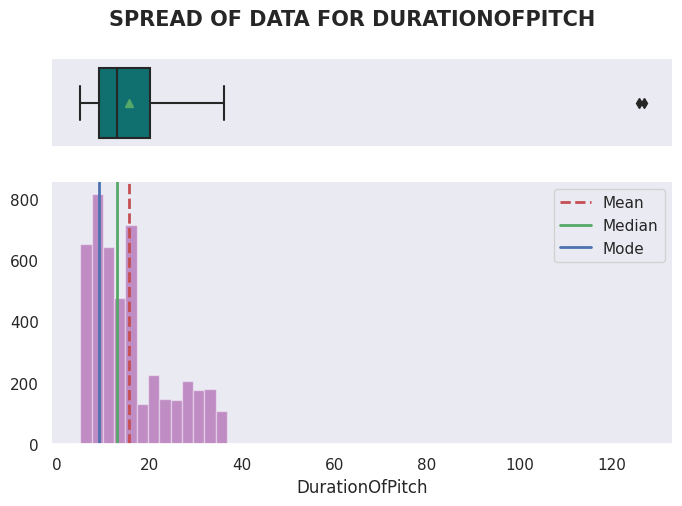

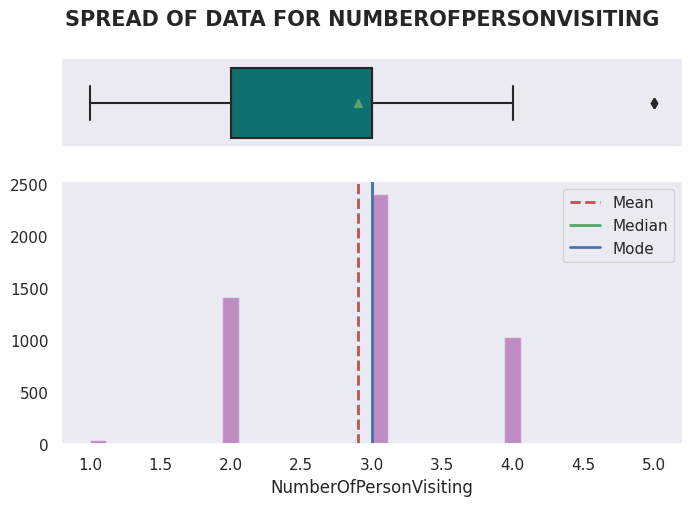

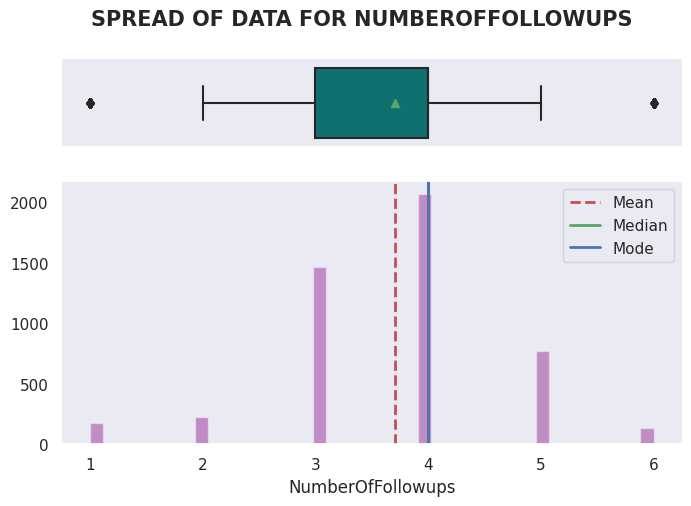

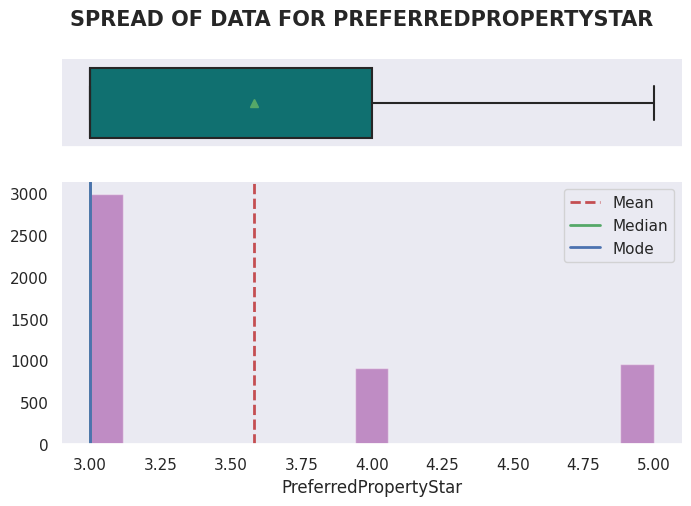

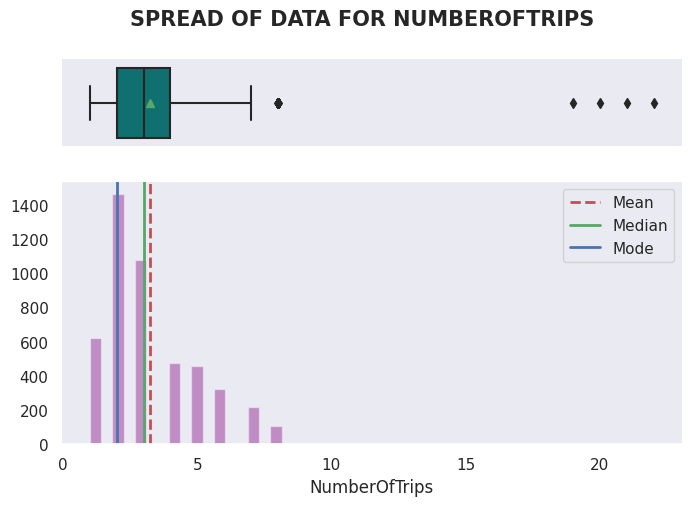

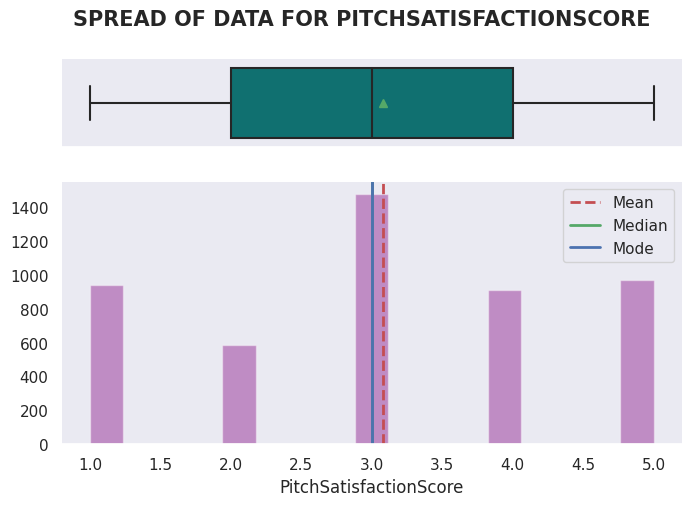

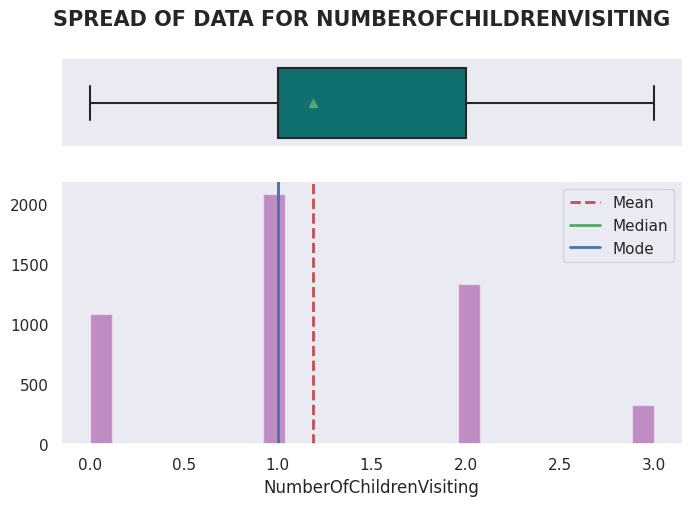

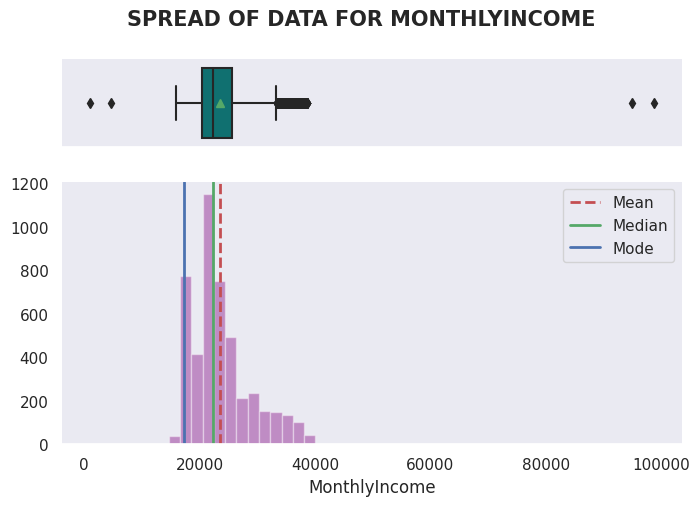

In [ ]:
# select all quantitative columns for checking the spread
list_col=  df.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

**Observations**
* Age is normally distributed and doesn't have any outliers.
* Duration of pitch is right skewed because of some outliers.
* Number of visitors is usually 3 with a outlier of 5.
* Average number of followups are 4 with some extreme of 1 and 6.
* Preferred property star is 3.
* Number of trips is right skewed with lots of outliers.
* Pitch satisfaction score is normally distributed.
* There is no outliers in Number of Children visiting.
* Monthly income is right skewed and has some outliers as higher end.

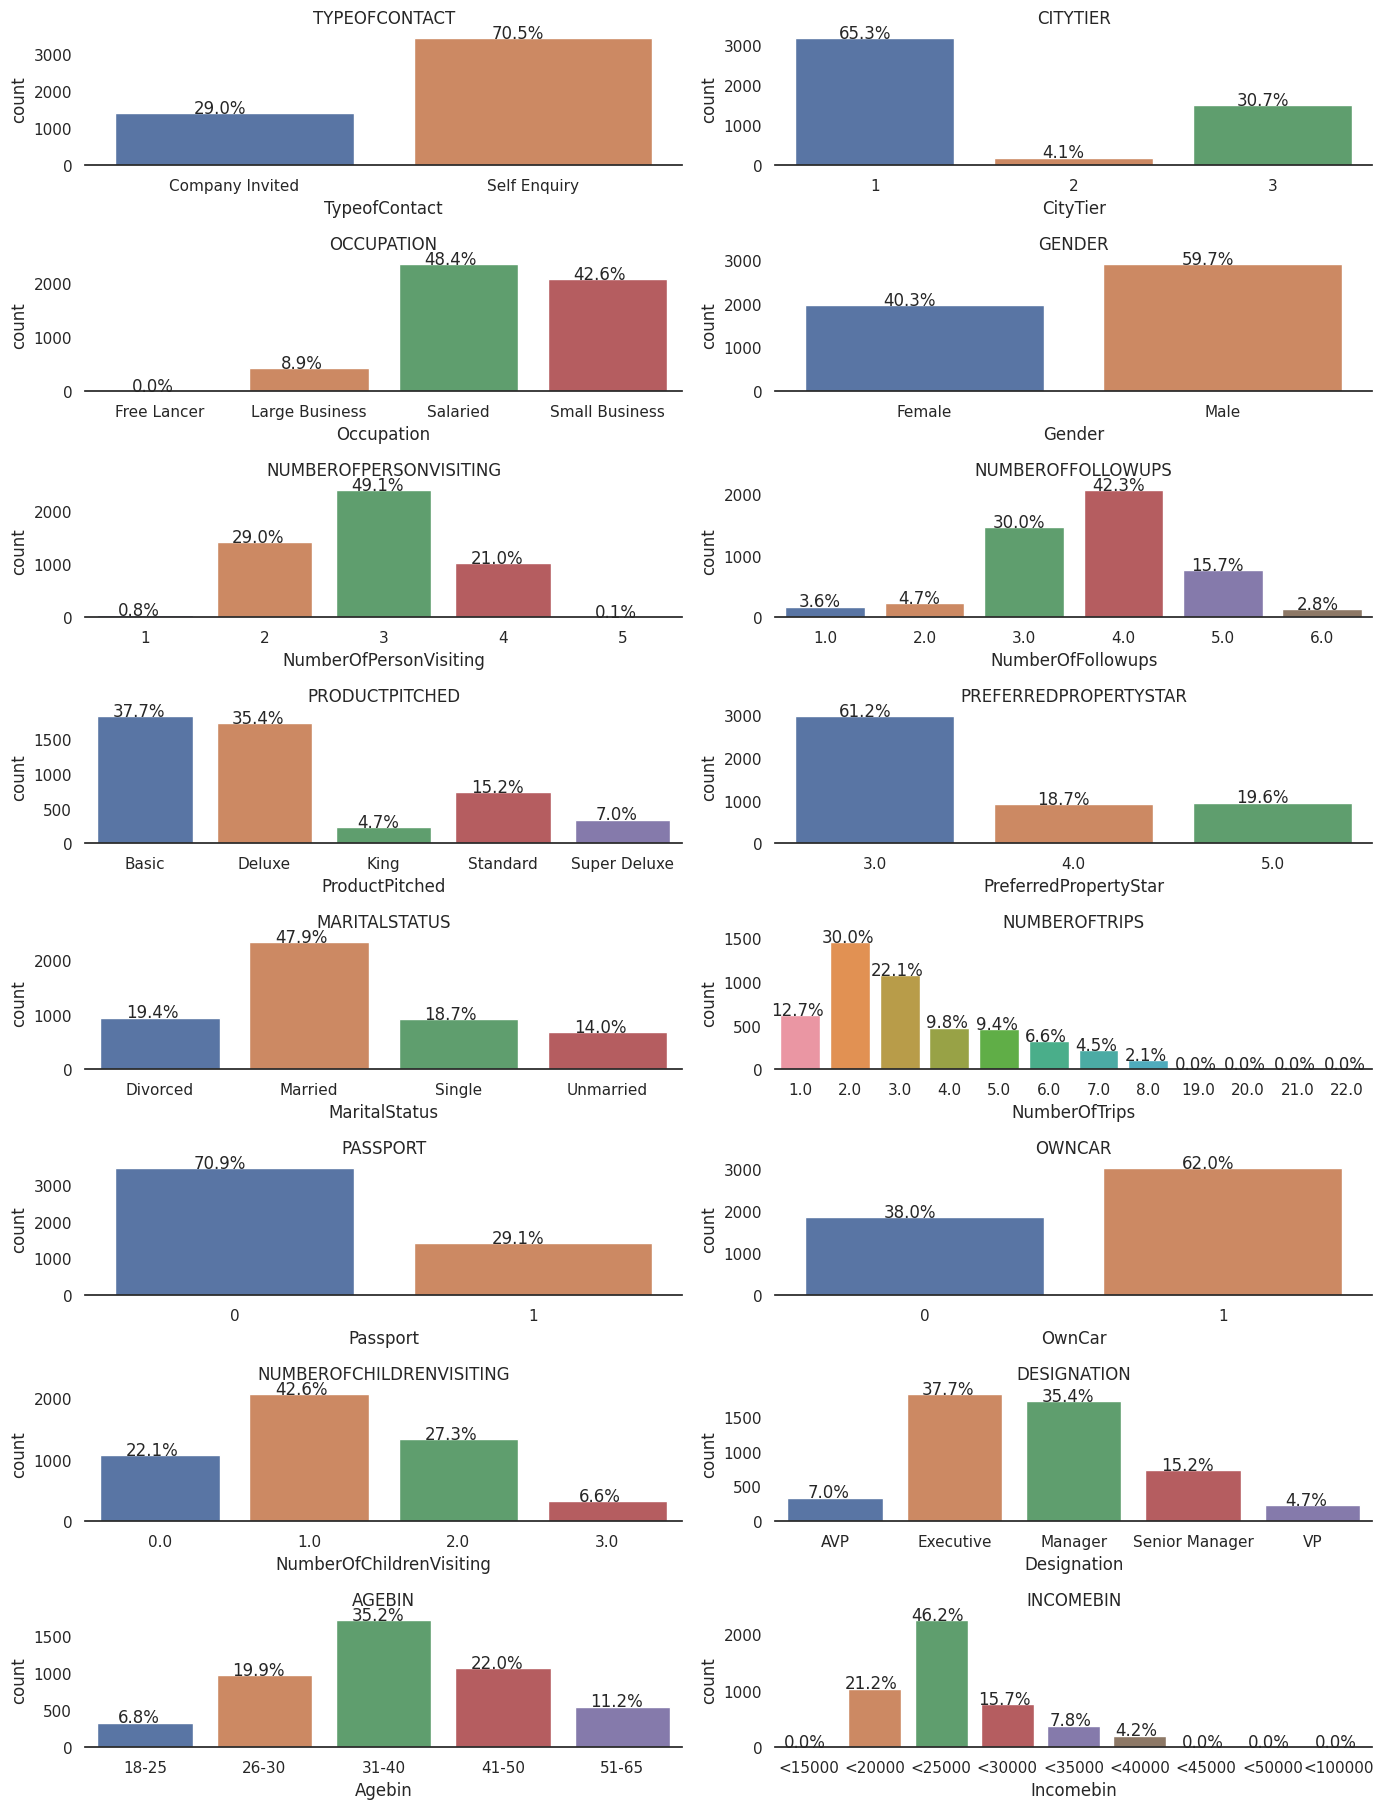

In [ ]:
# Making a list of all categorical variables

cols=['TypeofContact', 'CityTier', 'Occupation', 'Gender',
        'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched',
        'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips',
        'Passport','OwnCar','NumberOfChildrenVisiting',
        'Designation','Agebin','Incomebin']

plt.figure(figsize=(14,20))
sns.set_theme(style="white")
for i, variable in enumerate(cols):
                     plt.subplot(9,2,i+1)
                     order = df[variable].value_counts(ascending=False).index
                     ax=sns.countplot(x=df[variable], data=df)
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(cols[i].upper())

**Observations**

* ~ 70.5 % customers self enquired for the packages.
* ~ 65 % customers are from tier 1 cities.
* ~ 49 % customers are salaried and ~ 43 % are from small businesses.
* ~ 60 % customers are male.
* ~ 49 % customers travelled with 3 persons.
* ~ 42 % of customers were followed up 4 times.
* Basic package was pitched to ~38 % customers and ~ 35 % were pitched Delux package.
* ~ 61 % preferred 3 star property.
* ~ 48 % customers were married.
* Most of the customers take 2 trips per year.
* Only 29 % customers has a passport.
* 62 % customers own car.
* ~ 43 % customers visited with 1 child.
* ~ 38 % customers were executive and ~ 35 % were managers.
* ~ 35 % are in 31-40 age group. Most customers are in 26-50 age range.
* Monthly income of mojority of customers is 20,000-25,000. Most of the customers fall in 15,000-45,000 monthly income range.

## **Bivariate and Multivariate analysis**

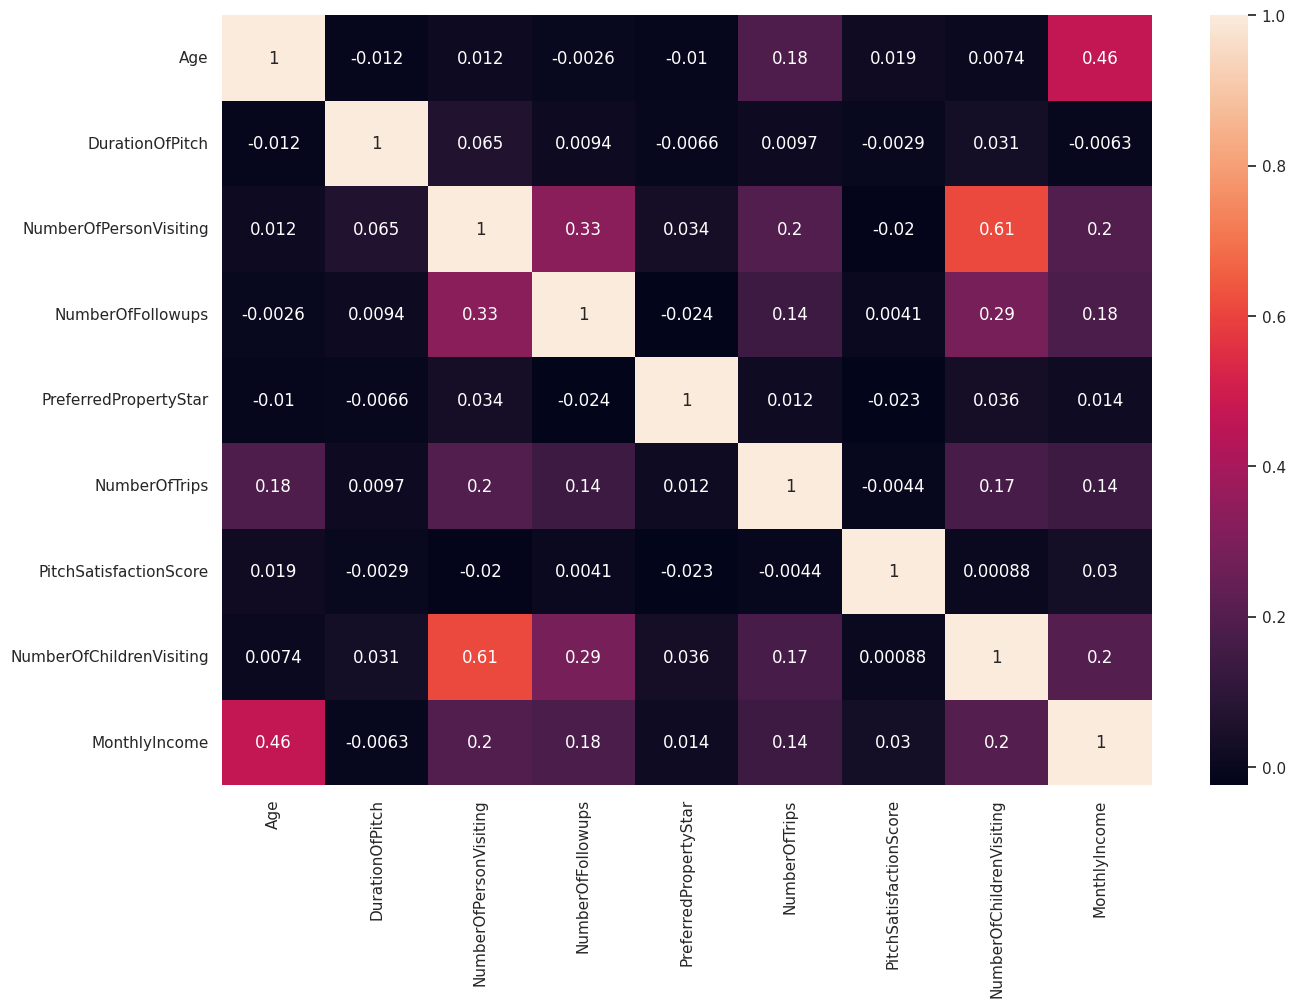

In [ ]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Observations**

* Monthlyincome and Age has weak correlation.
* Number of children visiting and number of person vsiting has correlation as expected.
* Number of follow up and number of person vsiting has very weak correlation.

In [ ]:
# Function to plot distributions and Boxplots of customers
def plot(x,target='ProdTaken'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))

    # distribution plots
    axs[0, 0].set_title(f'Distribution of {x} \n of a customer who had not taken Product',fontsize=12,fontweight='bold')
    sns.distplot(df[(df[target] == 0)][x],ax=axs[0,0],color='red')
    axs[0, 1].set_title(f"Distribution of {x}\n of a customer who had taken Product",fontsize=12,fontweight='bold')
    sns.distplot(df[(df[target] == 1)][x],ax=axs[0,1],color='green')

    # Box plots
    axs[1,0].set_title(f'Boxplot of {x} \n w.r.t Product taken',fontsize=12,fontweight='bold')
    sns.boxplot(x=df[target],y=df[x],ax=axs[1,0],palette='Set1',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} \n w.r.t Product Taken - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(x=df[target],y=df[x],ax=axs[1,1],showfliers=False,palette='Set1',showmeans=True) #turning off outliers from boxplot
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    plt.tight_layout(pad=4)
    plt.show()

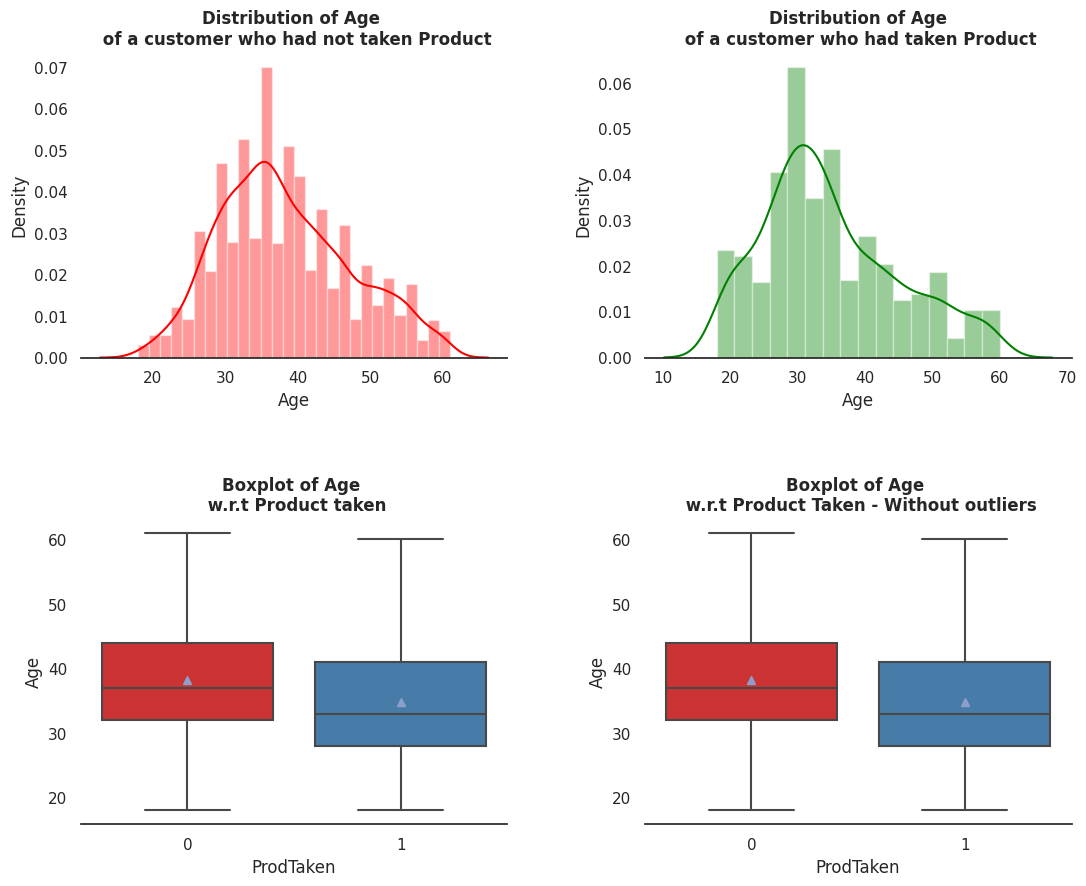

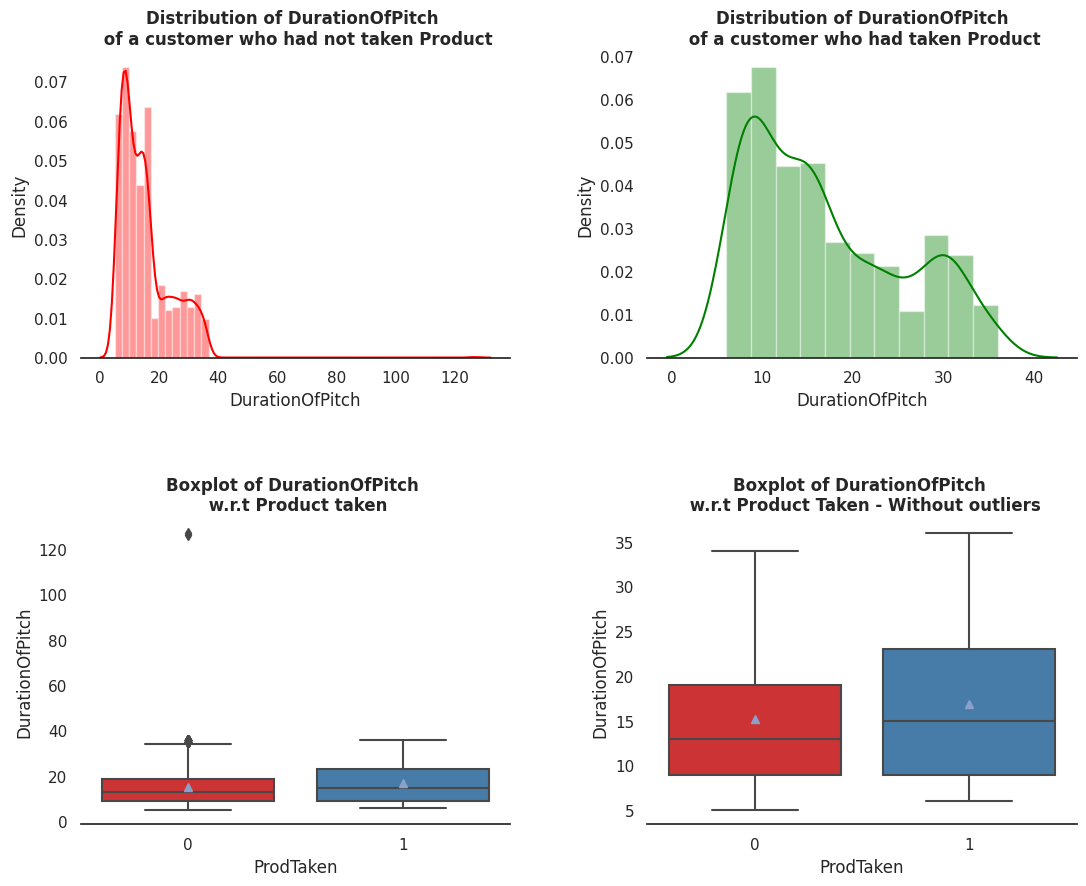

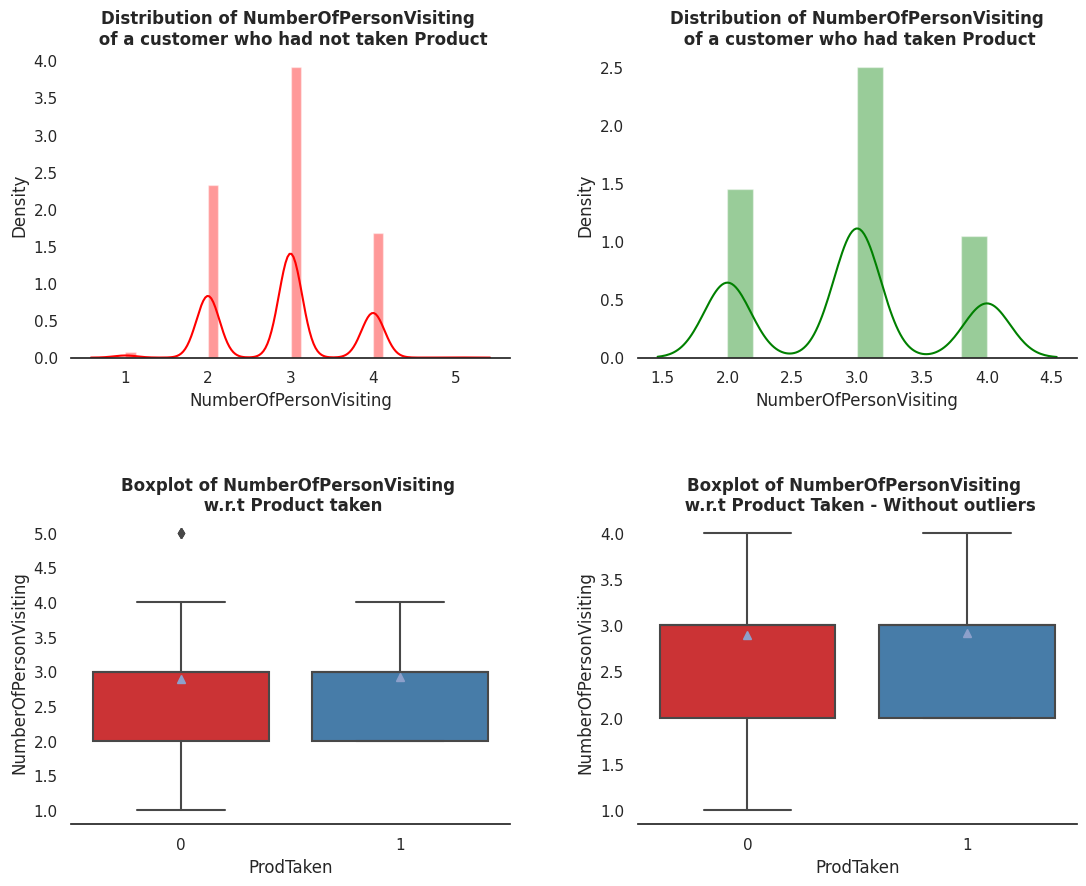

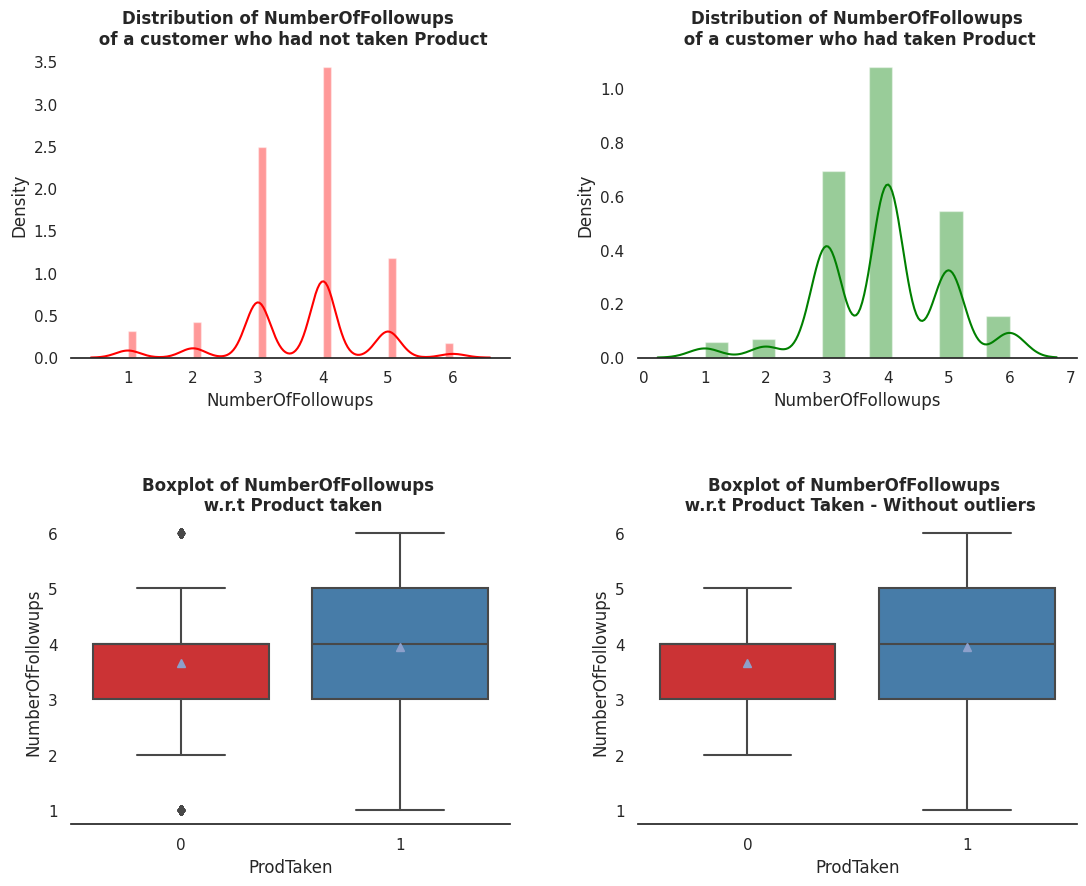

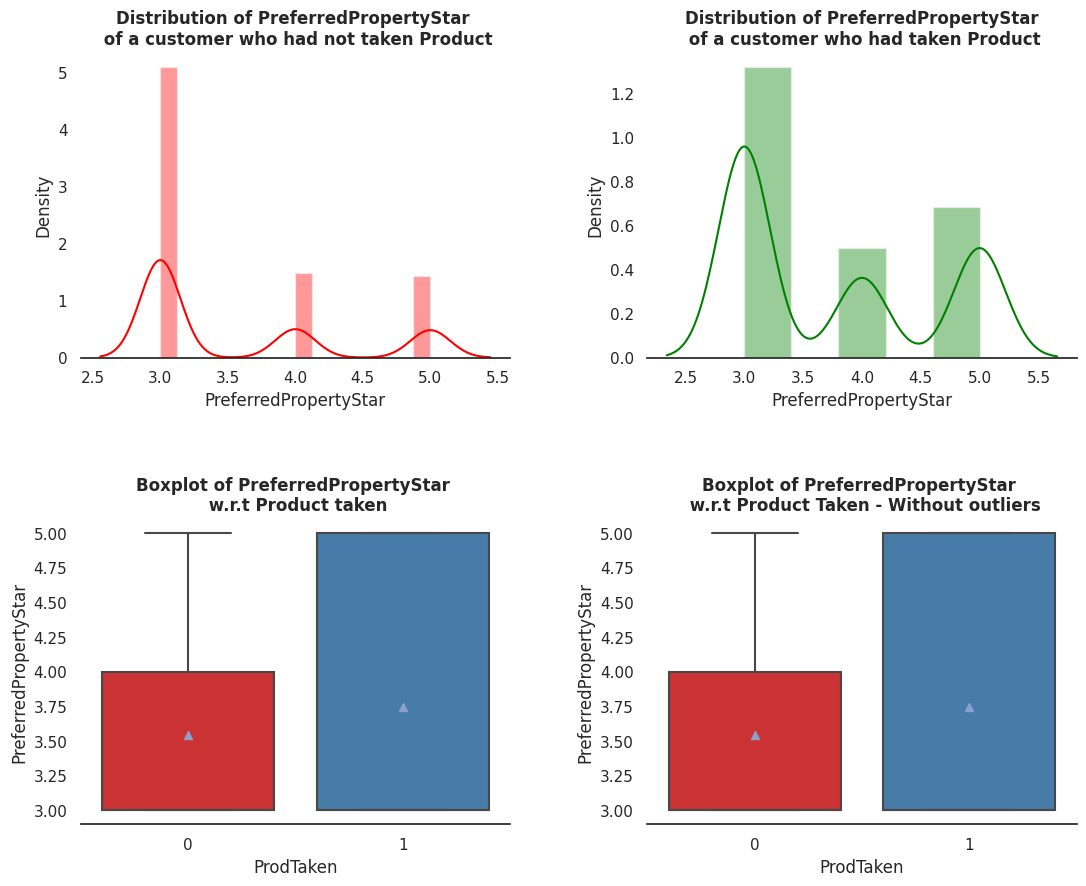

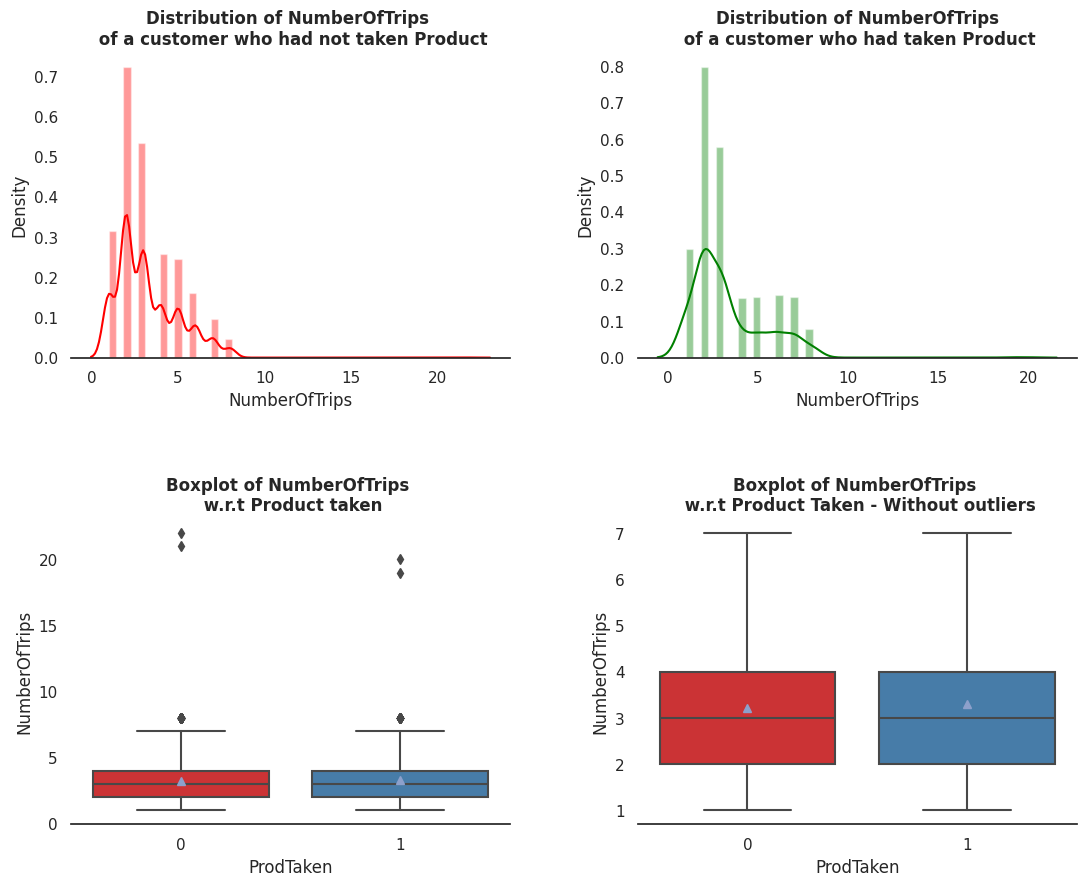

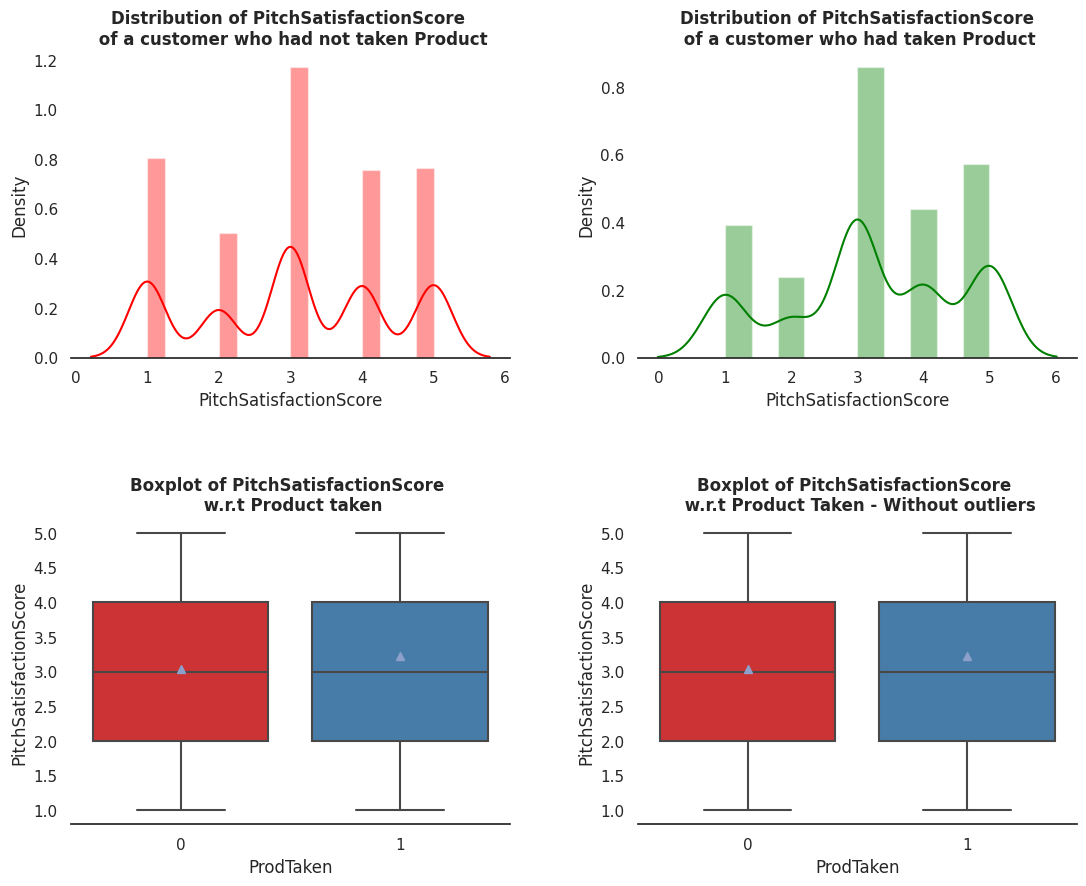

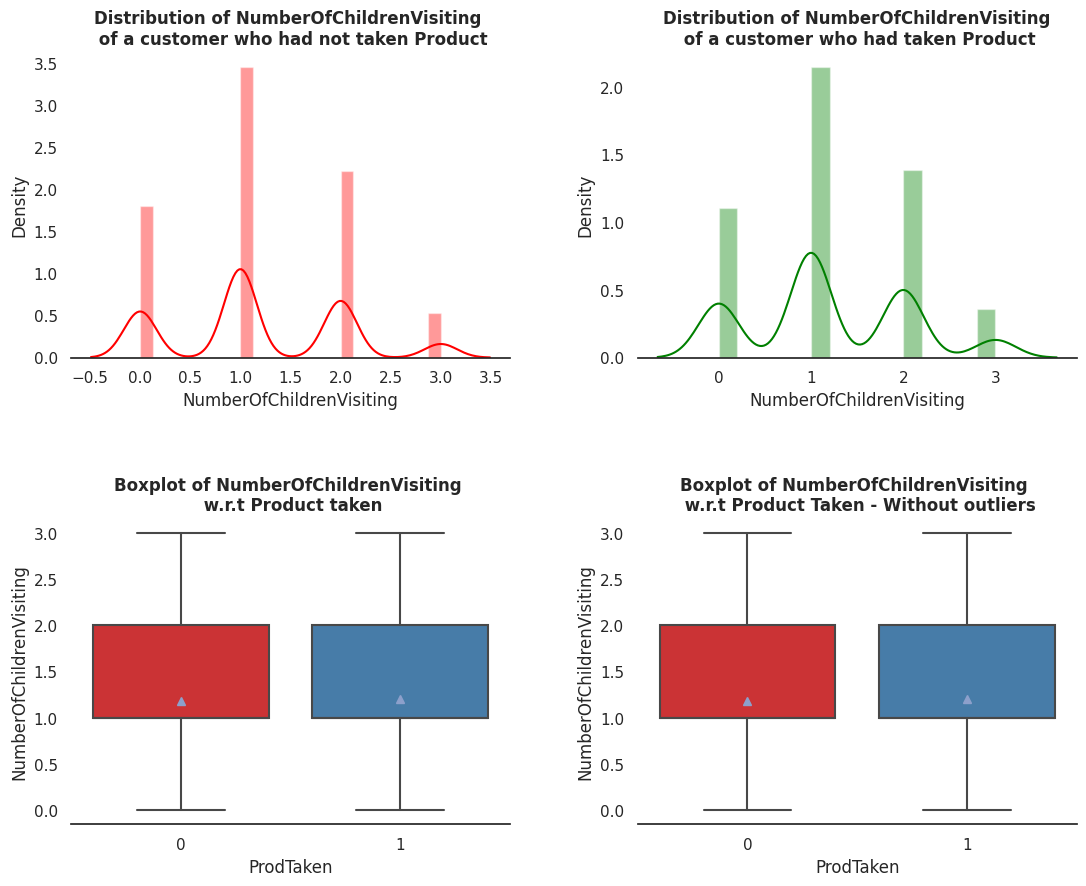

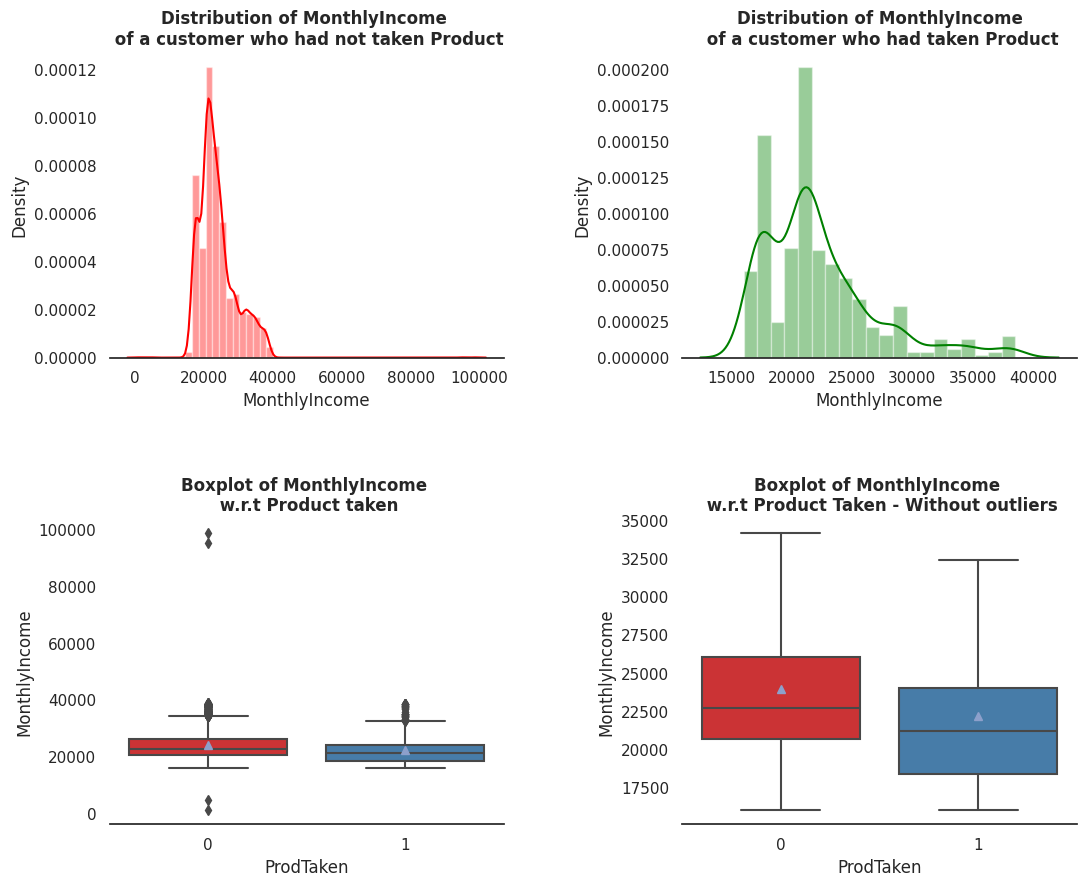

In [ ]:
list_col=df.select_dtypes(include='number').columns.to_list()
for j in range(len(list_col)):
   plot(list_col[j])

**Observations**

* Customers who purchased the package are mostly in age range of 28-35.
* Duration of pitch for customer who purchased product was 10-40 min.
* There is no outlier in the number of persons visiting with customers and number of followups for customers who have purchased the product.
* Number of trips has outliers for both type of customers.
* Monthly income has extreme outliers. Customers who purchased the package are earning on average 18,000-20,000 monthly.

**Missing Value Detection and Treatment**

In [ ]:
df.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
Agebin                      240
Incomebin                   233
dtype: int64

In [ ]:
df['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

In [ ]:
mode=df['TypeofContact'].mode()
df['TypeofContact']=df['TypeofContact'].fillna(mode[0])   # missing value treatment for type of contact

In [ ]:
df['TypeofContact'].isnull().sum()

0

In [ ]:
# missing value treatment for PreferredPropertyStar
# PreferredPropertyStar can depend on Designation
df['PreferredPropertyStar']=df.groupby(["Designation"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))
df["PreferredPropertyStar"].isnull().sum()

0

In [ ]:
# missing value treatment for number of followups
# number of followups may depend on gender and productpitched
df['NumberOfFollowups']=df.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].apply(lambda x:x.fillna(x.median()))

In [ ]:
df['NumberOfFollowups'].isnull().sum()

0

In [ ]:
# missing value treatment for number of trips
# number of trips may depend on marital status
df["NumberOfTrips"] = df.groupby(["MaritalStatus"])["NumberOfTrips"].apply(lambda x: x.fillna(x.median()))
df['NumberOfTrips'].isnull().sum()

0

In [ ]:
# missing value treatment for age
# missing value of age can be estimated using designation, gender, marital status
df.groupby(["Designation", "Gender","MaritalStatus"])["Age"].median()
df["Age"] = df.groupby(["Designation", "Gender","MaritalStatus"])["Age"].apply(lambda x: x.fillna(x.median()))

In [ ]:
# missing value treatment for monthly income
# monthly income may depend on occupation and designation
df.groupby(['Occupation','Designation'])["MonthlyIncome"].median()
df['MonthlyIncome']=df.groupby(['Occupation','Designation'])['MonthlyIncome'].apply(lambda x : x.fillna(x.median()))

In [ ]:
# missing value treatment for duration of pitch

df.groupby(['ProductPitched','NumberOfFollowups'], as_index=False)["DurationOfPitch"].median()
df["DurationOfPitch"] = df.groupby(["ProductPitched",'NumberOfFollowups'])["DurationOfPitch"].apply(
    lambda x: x.fillna(x.median())
)

In [ ]:
# missing value treatment for number of children visiting

df['NumberOfChildrenVisiting']=df['NumberOfChildrenVisiting'].fillna(0)

In [ ]:
df.isnull().sum()

ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome                 0
Agebin                      240
Incomebin                   233
dtype: int64

In [ ]:
df['Agebin'] = pd.cut(df['Age'], bins = [15,25,31,40,50,70], labels = ['15-25','26-30', '31-40', '41-50', '51-70'])

In [ ]:
df.Agebin.value_counts()

31-40    1894
41-50    1073
26-30    1025
51-70     549
15-25     347
Name: Agebin, dtype: int64

In [ ]:
df['Incomebin'] = pd.cut(df['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000],
                         labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])

In [ ]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
Agebin                      0
Incomebin                   0
dtype: int64

**Customer Profile by Product Type**

In [ ]:
profile=df[df['ProdTaken']==1]

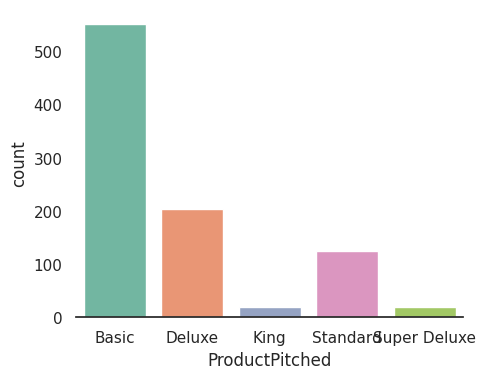

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='ProductPitched',data=profile)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

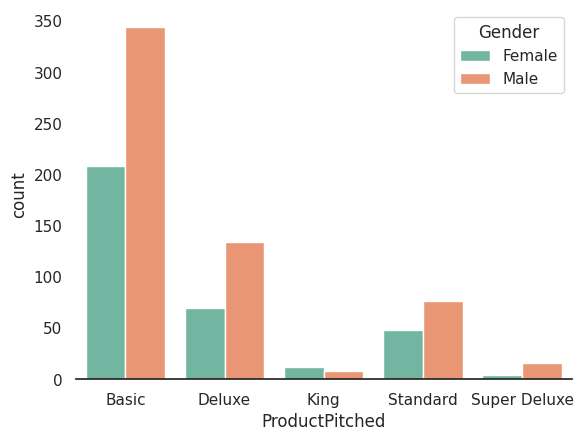

In [ ]:
sns.countplot(x='ProductPitched',hue='Gender',data=profile)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

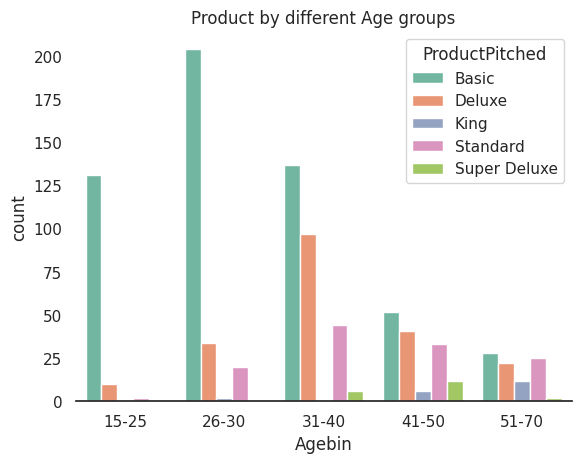

In [ ]:
sns.countplot(x="Agebin", hue='ProductPitched', data=profile).set_title('Product by different Age groups')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

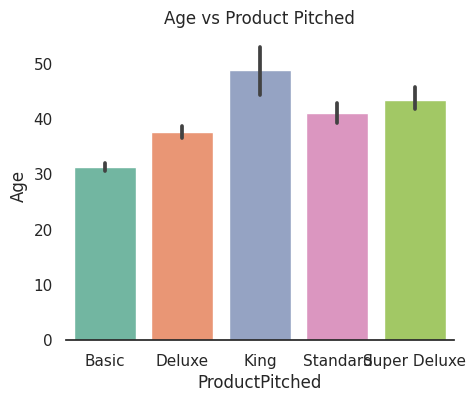

In [ ]:
plt.figure(figsize=(5,4))
sns.barplot(x='ProductPitched',y='Age',data=profile).set_title('Age vs Product Pitched')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

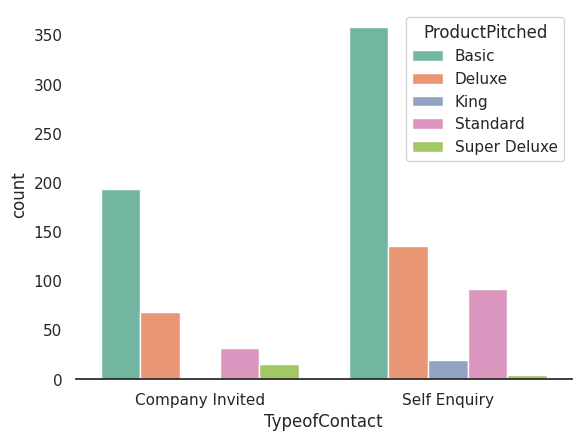

In [ ]:
sns.countplot(x='TypeofContact',hue='ProductPitched',data=profile)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

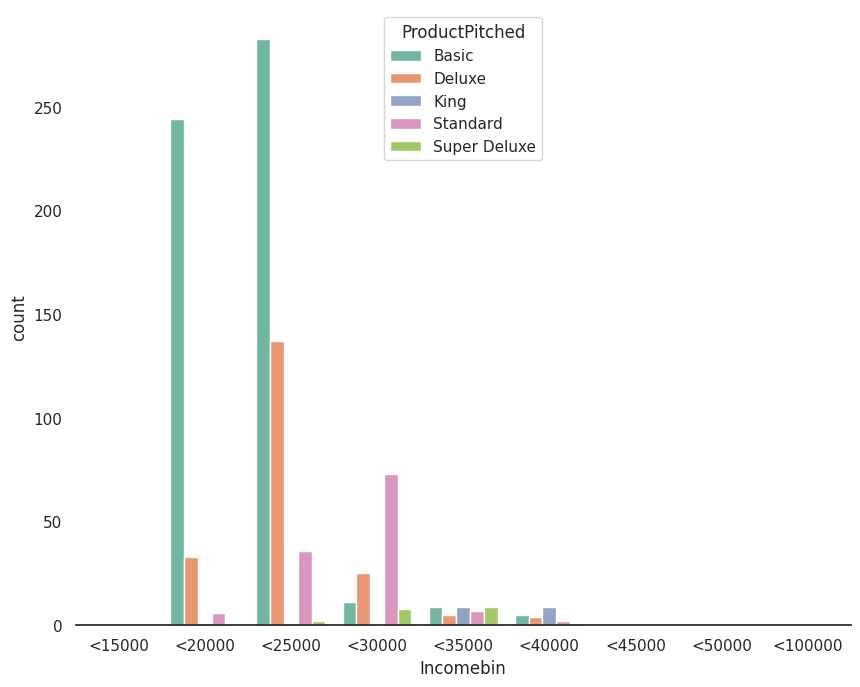

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='Incomebin',hue='ProductPitched',data=profile)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

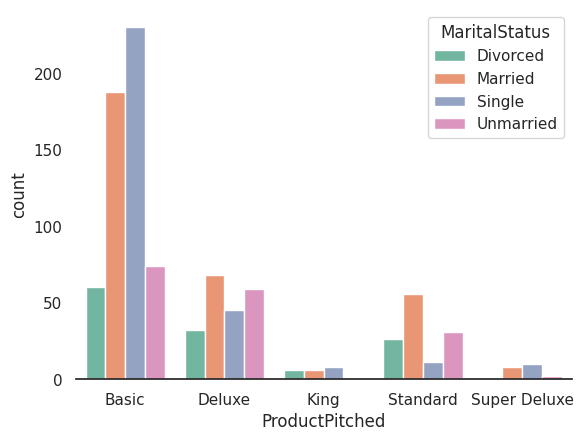

In [ ]:
sns.countplot(x='ProductPitched',hue='MaritalStatus',data=profile)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

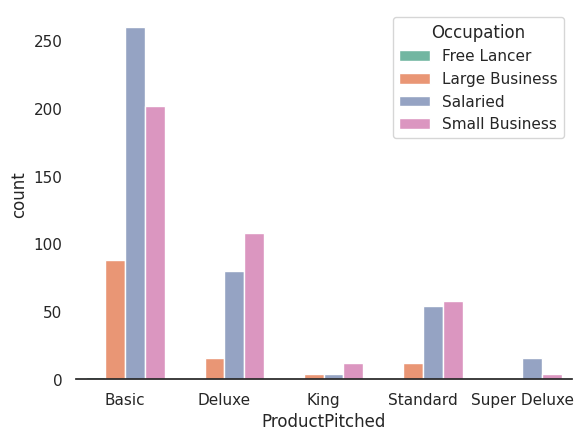

In [ ]:
sns.countplot(x='ProductPitched',hue='Occupation',data=profile)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

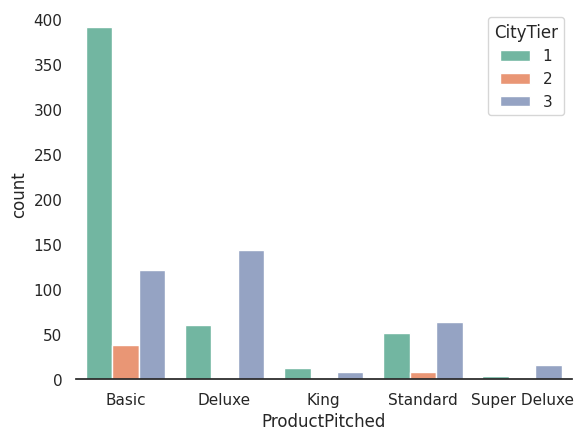

In [ ]:
sns.countplot(x='ProductPitched',hue='CityTier',data=profile)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

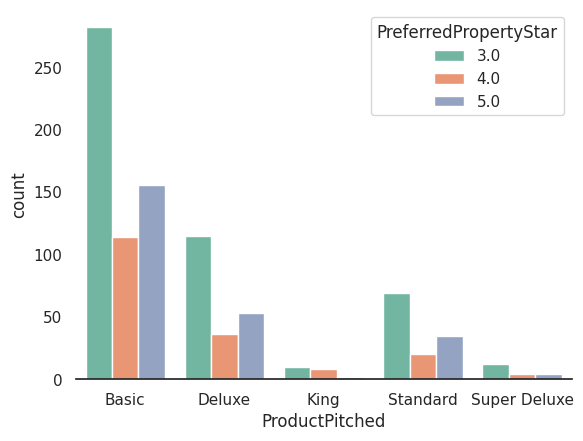

In [ ]:
sns.countplot(x="ProductPitched", data=profile,  hue="PreferredPropertyStar")
sns.despine(top=True,right=True,left=True) # to remove side line from graph

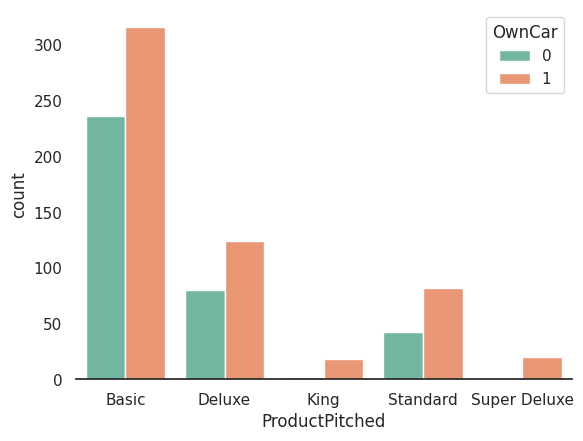

In [ ]:
sns.countplot(x="ProductPitched", data=profile,  hue="OwnCar")
sns.despine(top=True,right=True,left=True) # to remove side line from graph

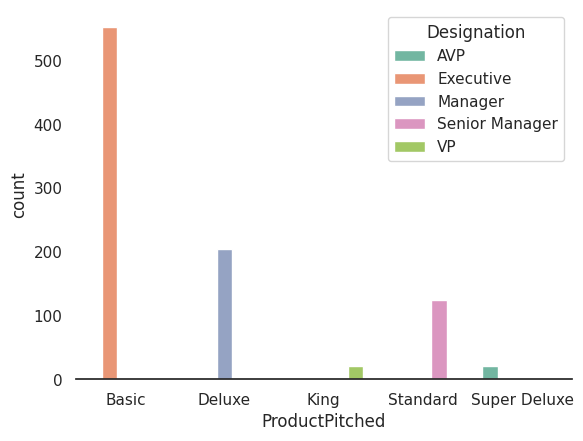

In [ ]:
sns.countplot(x="ProductPitched", data=profile,  hue="Designation")
sns.despine(top=True,right=True,left=True) # to remove side line from graph

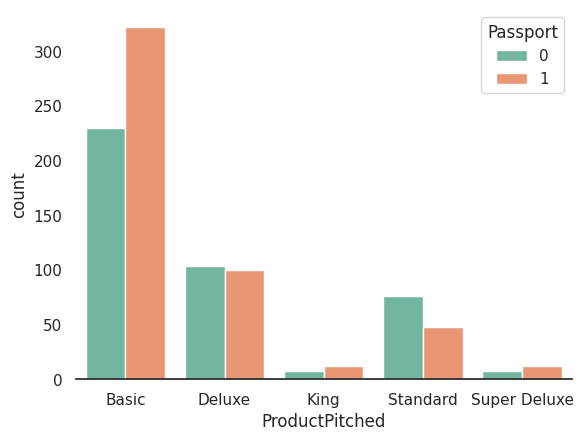

In [ ]:
sns.countplot(x="ProductPitched", data=profile,  hue="Passport")
sns.despine(top=True,right=True,left=True) # to remove side line from graph

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   catego

In [ ]:
## Function to plot stacked bar chart
def stacked_plot(x):

    tab1 = pd.crosstab(x,df['ProdTaken'],margins=True)
    print(tab1)
    print('-'*60)
    tab = pd.crosstab(x,df['ProdTaken'],normalize='index')
    sns.set_palette(sns.color_palette("magma", 8))
    tab.plot(kind='bar',stacked=True,figsize=(5,3))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc="upper left", labels=labels,title="Product Taken",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    plt.show()

ProdTaken     0    1   All
Agebin                    
15-25       204  143   347
26-30       765  260  1025
31-40      1610  284  1894
41-50       929  144  1073
51-70       460   89   549
All        3968  920  4888
------------------------------------------------------------


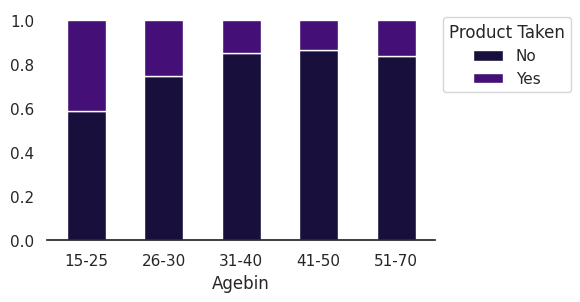

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2859  610  3469
All              3968  920  4888
------------------------------------------------------------


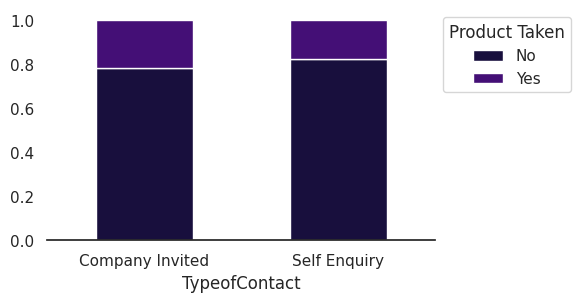

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------


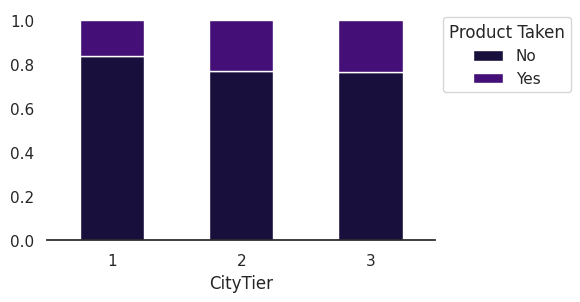

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------


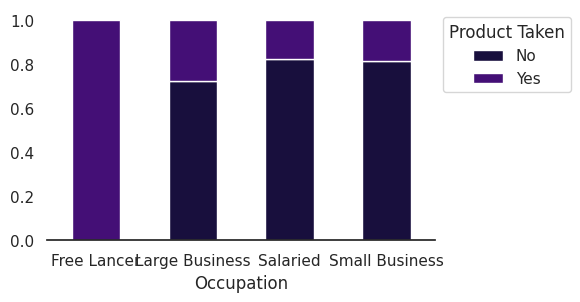

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------


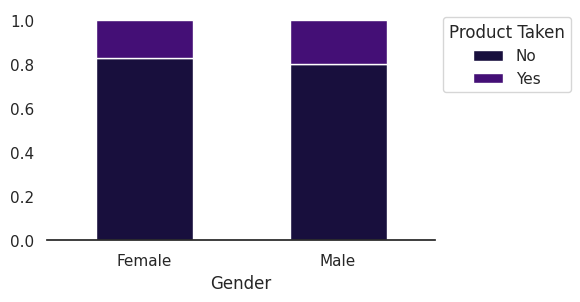

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
1                         39    0    39
2                       1151  267  1418
3                       1942  460  2402
4                        833  193  1026
5                          3    0     3
All                     3968  920  4888
------------------------------------------------------------


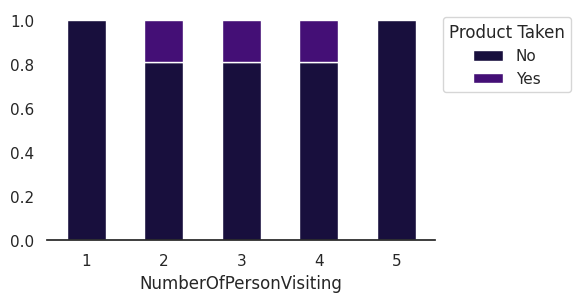

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2531  488  3019
4.0                     731  182   913
5.0                     706  250   956
All                    3968  920  4888
------------------------------------------------------------


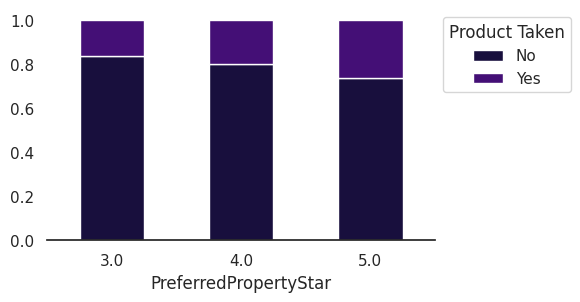

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------


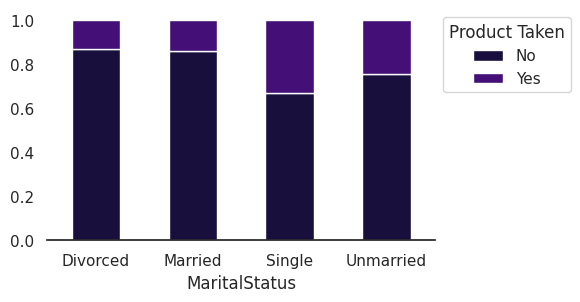

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------


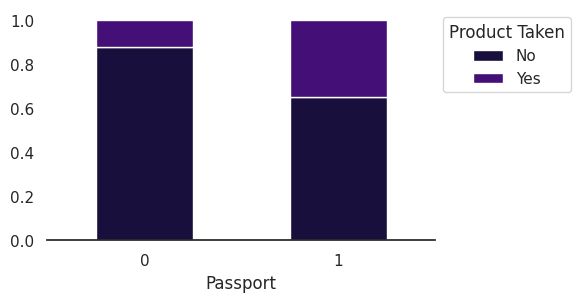

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------


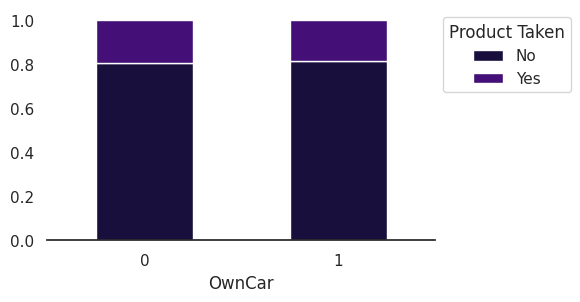

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
0.0                        939  209  1148
1.0                       1688  392  2080
2.0                       1082  253  1335
3.0                        259   66   325
All                       3968  920  4888
------------------------------------------------------------


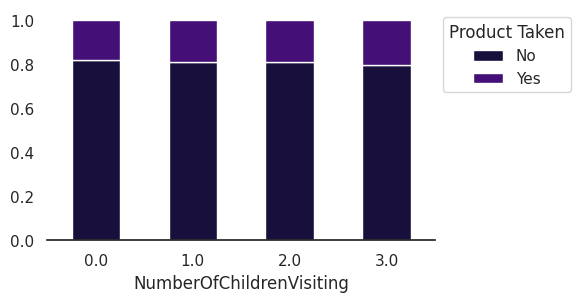

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------


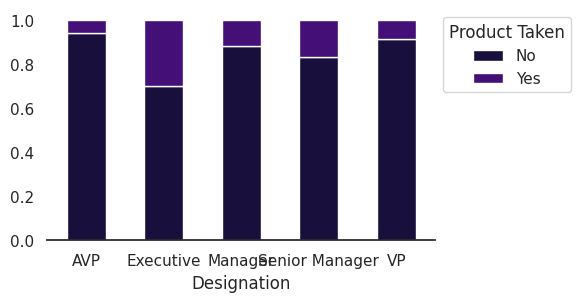

ProdTaken     0    1   All
Incomebin                 
<15000        2    0     2
<20000      754  284  1038
<25000     2031  459  2490
<30000      651  117   768
<35000      343   39   382
<40000      185   21   206
<100000       2    0     2
All        3968  920  4888
------------------------------------------------------------


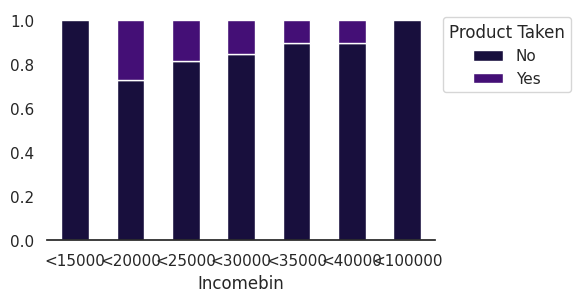

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------


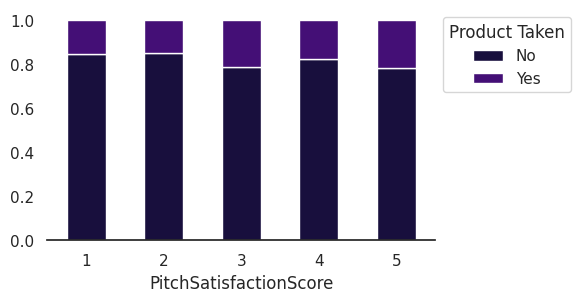

ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 156   20   176
2.0                 205   24   229
3.0                1222  244  1466
4.0                1726  387  2113
5.0                 577  191   768
6.0                  82   54   136
All                3968  920  4888
------------------------------------------------------------


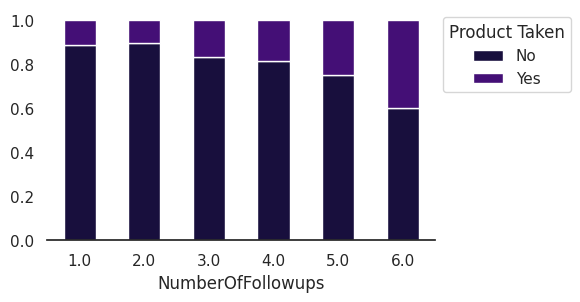

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------


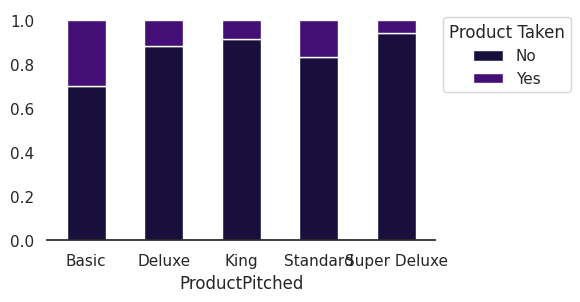

In [ ]:
list=['Agebin','TypeofContact','CityTier','Occupation','Gender','NumberOfPersonVisiting','PreferredPropertyStar','MaritalStatus',
      'Passport','OwnCar','NumberOfChildrenVisiting','Designation','Incomebin','PitchSatisfactionScore','NumberOfFollowups',
      'ProductPitched']
for i, variable in enumerate(list):
       stacked_plot(df[variable])

# **Insights based on EDA**

**Customer Profile according to product pitched**

| Name    |Basic        |Delux     |King       |Standard       |Super Delux      |
|---------|-----------|----------|------------|---------------|-----|
| Age | 26-30 | 31-40 | 51-70 | 31-40 | 41-50 |
|Monthly Income   | <25000  | <25000 |30000-40000|<30000|25000-35000|
| City Tier | 1  | 3 | 1 or 3 | 3 | 3|
| Marital Status | Single>Married | almost all | mostly all except unmarried | married | mostly single and married |
| Gender | mostly male | mostly male | mostly female | mostly male | moslty male |
| Occupation | mostly salaried>small business>large business | mostly small business | mostly small business | mostly small business and salaried | mostly salaried |
| Designation | Executive | Manager | VP | Senior Manager | AVP |

* Mostly customer visting with 2,3,4 travellers purchased the product.
* Mostly Customers who had passport bought the product.
* Most of the customers who bought the product were Executive and Senior manager.
* Customers who were followed up 6 times had purchases the product
* Company invited customers mostly purchased packages and preferred 5 star rated properties and were mostly from city tier 2,3.
* Customer from 18-25 age purchased the product taken, followed by 26-30.
* Customers who earn 15000-20000 purchased product followed by customers in income range 20000-25000.
* Single and unmarried people has higher chance of purchasing the travel package.
* Customers who took 7 to 8 trips had higher chances of purchaing the packages
* Customers mostly purchased the travel package when marketing team did high number of followups ,higher duration of pitch, and pitched Basic product.

**Outlier Detection**

In [ ]:
Q1 = df_tour.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = df_tour.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [ ]:
n_outliers=((df.select_dtypes(include=['int64','float64'])<lower) | (df.select_dtypes(include=['int64','float64'])>upper)).sum()
(n_outliers/len(df))*100

Age                         0.000000
CityTier                    0.000000
CustomerID                  0.000000
DurationOfPitch             0.040917
MonthlyIncome               7.058101
NumberOfChildrenVisiting    0.000000
NumberOfFollowups           6.382979
NumberOfPersonVisiting      0.061375
NumberOfTrips               2.229951
OwnCar                      0.000000
Passport                    0.000000
PitchSatisfactionScore      0.000000
PreferredPropertyStar       0.000000
ProdTaken                   0.000000
dtype: float64

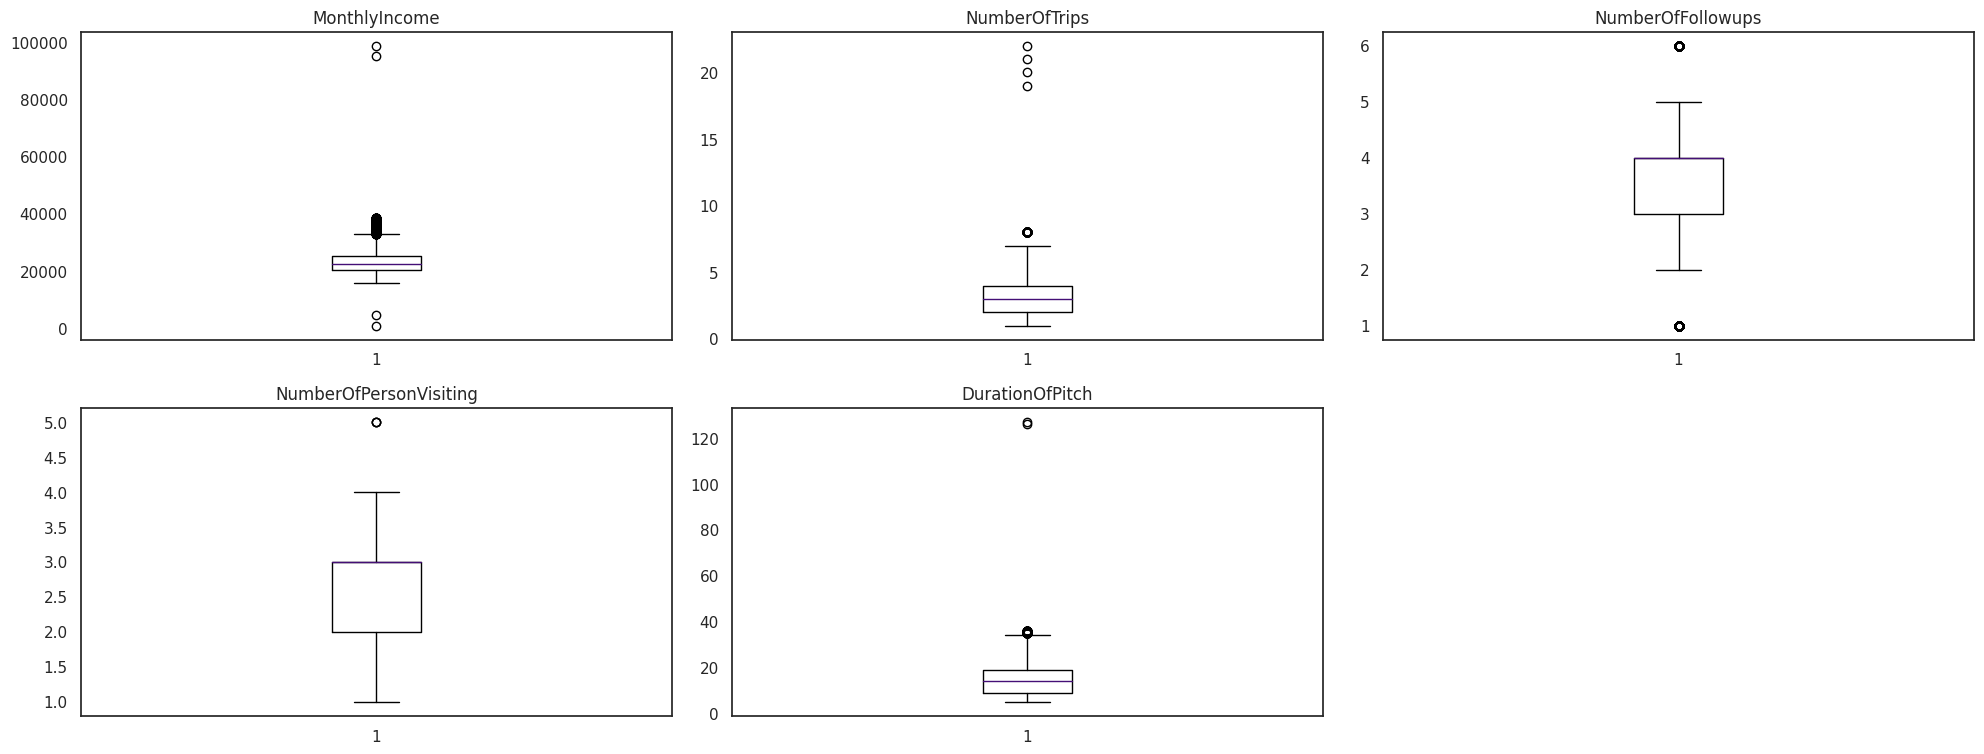

In [ ]:
outlier_columns = ['MonthlyIncome','NumberOfTrips','NumberOfFollowups','NumberOfPersonVisiting','DurationOfPitch']
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(outlier_columns):
                     plt.subplot(8,3,i+1)
                     plt.boxplot(df[variable])
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [ ]:
# Check Number of person visiting extreme values
df.sort_values(by=['NumberOfPersonVisiting'],ascending = False)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
3977,0,60.0,Self Enquiry,3,32.0,Salaried,Female,5,4.0,Standard,...,Unmarried,2.0,0,3,1,2.0,Senior Manager,26315.0,51-70,<30000
4002,0,31.0,Self Enquiry,1,9.0,Salaried,Male,5,5.0,Deluxe,...,Married,3.0,0,4,1,2.0,Manager,22830.0,26-30,<25000
4105,0,28.0,Self Enquiry,1,16.0,Small Business,Female,5,4.0,Basic,...,Single,3.0,0,3,0,2.0,Executive,20957.0,26-30,<25000
3275,1,32.0,Company Invited,1,22.0,Small Business,Male,4,4.0,Basic,...,Divorced,3.0,0,4,1,3.0,Executive,21288.0,31-40,<25000
3266,0,35.0,Company Invited,1,9.0,Salaried,Male,4,4.0,Deluxe,...,Unmarried,4.0,0,4,1,3.0,Manager,22711.0,31-40,<25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,0,31.0,Company Invited,1,30.0,Large Business,Female,1,3.0,Deluxe,...,Single,3.0,0,1,1,0.0,Manager,20238.0,26-30,<25000
1835,0,46.0,Company Invited,1,13.0,Small Business,Female,1,3.0,Deluxe,...,Married,3.0,0,5,1,0.0,Manager,20258.0,41-50,<25000
81,0,35.0,Self Enquiry,1,6.0,Small Business,Male,1,4.0,Basic,...,Single,2.0,0,4,1,0.0,Executive,17859.0,31-40,<20000
1751,0,42.0,Self Enquiry,3,6.0,Salaried,Male,1,3.0,Deluxe,...,Married,2.0,0,3,1,0.0,Manager,19907.0,41-50,<20000


In [ ]:
#Dropping Number of person visiting  greater than 4. There are just 3 such observations
df.drop(index=df[df.NumberOfPersonVisiting>4].index,inplace=True)

In [ ]:
# Check Duration Of Pitch extreme values
df.sort_values(by=['DurationOfPitch'],ascending = False)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,...,Married,4.0,0,1,1,2.0,Executive,22160.0,51-70,<25000
1434,0,32.0,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,...,Married,3.0,0,1,1,1.0,Executive,18482.0,31-40,<20000
3423,0,35.0,Self Enquiry,1,36.0,Small Business,Male,3,4.0,Deluxe,...,Divorced,6.0,0,3,0,1.0,Manager,24107.0,31-40,<25000
4118,1,39.0,Self Enquiry,1,36.0,Small Business,Male,4,4.0,Deluxe,...,Married,2.0,1,3,1,3.0,Manager,25351.0,31-40,<30000
3975,0,39.0,Company Invited,1,36.0,Salaried,Female,3,4.0,Deluxe,...,Single,3.0,0,3,1,1.0,Manager,21084.0,31-40,<25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,0,50.0,Self Enquiry,3,5.0,Small Business,Male,2,3.0,King,...,Married,5.0,1,5,0,1.0,VP,34331.0,41-50,<35000
2276,0,52.0,Self Enquiry,1,5.0,Salaried,Male,2,3.0,Standard,...,Unmarried,1.0,0,3,1,1.0,Senior Manager,25445.0,51-70,<30000
1901,0,35.5,Self Enquiry,1,5.0,Salaried,Female,2,3.0,Deluxe,...,Single,1.0,0,1,0,0.0,Manager,22841.0,31-40,<25000
326,0,39.0,Company Invited,1,5.0,Small Business,Male,2,4.0,King,...,Divorced,2.0,0,5,1,1.0,VP,34272.0,31-40,<35000


In [ ]:
#Dropping Duration of pitch  greater than 36. There are just 2 such observations
df.drop(index=df[df.DurationOfPitch>36].index,inplace=True)

In [ ]:
# Check MonthlyIncome extreme values
df.sort_values(by=["MonthlyIncome"],ascending = False)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,...,Divorced,2.0,1,2,1,1.0,Executive,98678.0,31-40,<100000
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,...,Divorced,1.0,1,2,1,0.0,Executive,95000.0,31-40,<100000
4104,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,...,Married,2.0,0,1,1,3.0,VP,38677.0,51-70,<40000
2634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,...,Divorced,2.0,0,2,1,2.0,VP,38677.0,51-70,<40000
4660,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,...,Married,3.0,0,4,1,2.0,VP,38651.0,41-50,<40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,0,18.0,Company Invited,1,11.0,Salaried,Male,3,3.0,Basic,...,Single,2.0,0,2,1,1.0,Executive,16051.0,15-25,<20000
1983,1,20.0,Self Enquiry,1,16.0,Small Business,Male,2,3.0,Basic,...,Single,2.0,1,5,1,1.0,Executive,16009.0,15-25,<20000
513,1,20.0,Self Enquiry,1,16.0,Small Business,Male,2,3.0,Basic,...,Single,2.0,1,5,0,0.0,Executive,16009.0,15-25,<20000
2586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,...,Single,5.0,1,5,0,1.0,Manager,4678.0,31-40,<15000


In [ ]:
#Dropping monthly income less than 16000 or greater than 40000. There are just 4 such observations
df.drop(index=df[(df.MonthlyIncome>40000) | (df.MonthlyIncome<12000)].index,inplace=True)

In [ ]:
df.sort_values(by=['NumberOfTrips'],ascending=False)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,...,Unmarried,22.0,0,2,1,1.0,Manager,25460.0,31-40,<30000
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,...,Unmarried,21.0,0,2,1,0.0,Manager,21782.0,31-40,<25000
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,...,Single,20.0,1,4,1,2.0,Executive,20963.0,26-30,<25000
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,...,Single,19.0,1,4,1,1.0,Executive,17285.0,26-30,<20000
3074,0,23.0,Self Enquiry,1,7.0,Salaried,Male,3,5.0,Deluxe,...,Divorced,8.0,0,2,1,1.0,Manager,23453.0,15-25,<25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,0,39.0,Self Enquiry,3,8.0,Salaried,Male,2,1.0,Standard,...,Unmarried,1.0,0,1,0,0.0,Senior Manager,22880.0,31-40,<25000
1013,0,30.0,Self Enquiry,3,14.0,Small Business,Female,3,3.0,Deluxe,...,Married,1.0,0,3,1,0.0,Manager,19779.0,26-30,<20000
1007,1,29.0,Company Invited,1,20.0,Salaried,Female,2,3.0,Standard,...,Unmarried,1.0,1,5,1,0.0,Senior Manager,22553.0,26-30,<25000
2179,1,31.0,Company Invited,1,15.0,Small Business,Male,2,4.0,Basic,...,Single,1.0,1,3,0,1.0,Executive,17321.0,26-30,<20000


In [ ]:
# Dropping number of trips greater than 10. There are just 4 such observations
df.drop(index=df[df['NumberOfTrips']>10].index,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4875 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4875 non-null   category
 1   Age                       4875 non-null   float64 
 2   TypeofContact             4875 non-null   category
 3   CityTier                  4875 non-null   category
 4   DurationOfPitch           4875 non-null   float64 
 5   Occupation                4875 non-null   category
 6   Gender                    4875 non-null   category
 7   NumberOfPersonVisiting    4875 non-null   int64   
 8   NumberOfFollowups         4875 non-null   float64 
 9   ProductPitched            4875 non-null   category
 10  PreferredPropertyStar     4875 non-null   float64 
 11  MaritalStatus             4875 non-null   category
 12  NumberOfTrips             4875 non-null   float64 
 13  Passport                  4875 non-null   catego

**Split the Dataset**

In [ ]:
# indenpendent and dependent variables
X=df.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch','Agebin','Incomebin'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y=df['ProdTaken']

In [ ]:
X.head()

,Age,NumberOfPersonVisiting,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Self Enquiry,CityTier_2,CityTier_3,Occupation_Large Business,...,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Passport_1,OwnCar_1,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,41.0,3,3.0,1.0,0.0,20993.0,1,0,1,0,...,0,0,1,0,1,1,0,1,0,0
1,49.0,3,4.0,2.0,2.0,20130.0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,37.0,3,3.0,7.0,0.0,17090.0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,0
3,33.0,2,3.0,2.0,1.0,17909.0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
4,32.0,2,4.0,1.0,0.0,18468.0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0


In [ ]:
column_names = X.columns
feature_names = column_names
print(feature_names)

Index(['Age', 'NumberOfPersonVisiting', 'PreferredPropertyStar',
       'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome',
       'TypeofContact_Self Enquiry', 'CityTier_2', 'CityTier_3',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'Gender_Male', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Passport_1',
       'OwnCar_1', 'Designation_Executive', 'Designation_Manager',
       'Designation_Senior Manager', 'Designation_VP'],
      dtype='object')


In [ ]:
# Splitting the data into train and test sets in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
X_train.shape, X_test.shape

((3412, 22), (1463, 22))

In [ ]:
def make_confusion_matrix(y_actual,y_predict,title):
    fig, ax = plt.subplots(1, 1)

    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',colorbar=True,ax=ax)
    ax.set_title(title)
    plt.show()

In [ ]:
# Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score

def get_metrics_score(model,X_train,X_test,y_train,y_test,flag=True):

    score_list=[]       # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)


    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)

    train_acc = accuracy_score(y_train,pred_train)
    test_acc = accuracy_score(y_test,pred_test)

    train_recall = recall_score(y_train,pred_train)
    test_recall = recall_score(y_test,pred_test)

    train_precision = precision_score(y_train,pred_train)
    test_precision = precision_score(y_test,pred_test)

    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)


    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))

    if flag == True:
        score={
              'Train_data': [train_acc,train_recall,train_precision,train_f1,round(roc_auc_score(y_train,pred_train),3)],
              'Test_data': [test_acc,test_recall,test_precision,test_f1,round(roc_auc_score(y_test,pred_test),3)]
              }
        tab1 = pd.DataFrame(score,index=['Accuracy','Recall','Precision','F1 score','roc-auc-score'])
        print(tab1)
        make_confusion_matrix(y_train,pred_train,"Confusion Matrix for Train")
        make_confusion_matrix(y_test,pred_test,"Confusion Matrix for Test")

    return score_list # returning the list with train and test score

# **Model Building**

## **Random Forest**

In [ ]:
rf=RandomForestClassifier(n_estimators=200,criterion='gini',random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=1)

               Train_data  Test_data
Accuracy              1.0   0.893370
Recall                1.0   0.483636
Precision             1.0   0.904762
F1 score              1.0   0.630332
roc-auc-score         1.0   0.736000


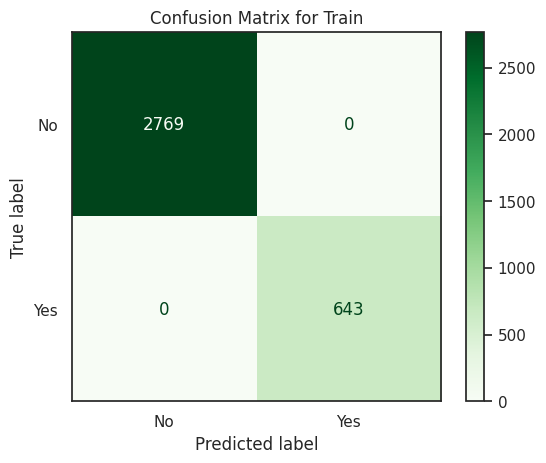

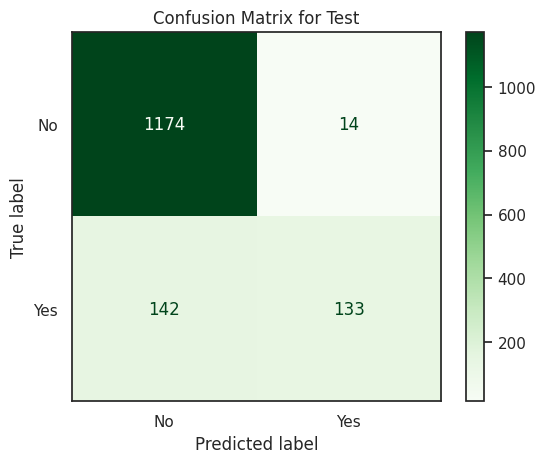

In [ ]:
# Let's check model performances for this model
scores_Sklearn_rf = get_metrics_score(rf,X_train,X_test,y_train,y_test,flag=True)

Random Forest is overfitting the data. Recall score is low for the test data.

**Tuning Random Forest**

In [ ]:
rf_tuned=RandomForestClassifier(class_weight={0:0.25,1:0.75},random_state=1)
parameters={
    'max_depth': [5,10,15],
    'n_estimators':[100,200,300,400],
    'min_samples_leaf':np.arange(5,10),
    'max_features':['auto'],
    'max_samples':[0.3,0.5,0.7]
}

In [ ]:
grid=GridSearchCV(estimator=rf_tuned,param_grid=parameters,scoring='accuracy',cv=5)
grid=grid.fit(X_train,y_train)
rf_tuned=grid.best_estimator_
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.25, 1: 0.75}, max_depth=15,
                       max_features='auto', max_samples=0.7, min_samples_leaf=5,
                       n_estimators=300, random_state=1)

               Train_data  Test_data
Accuracy         0.901817   0.857143
Recall           0.729393   0.563636
Precision        0.744444   0.635246
F1 score         0.736842   0.597303
roc-auc-score    0.836000   0.744000


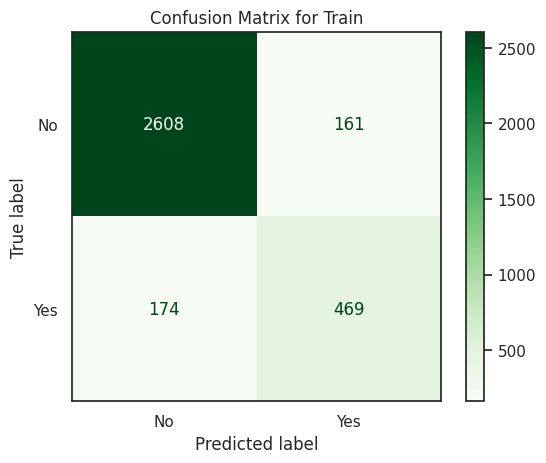

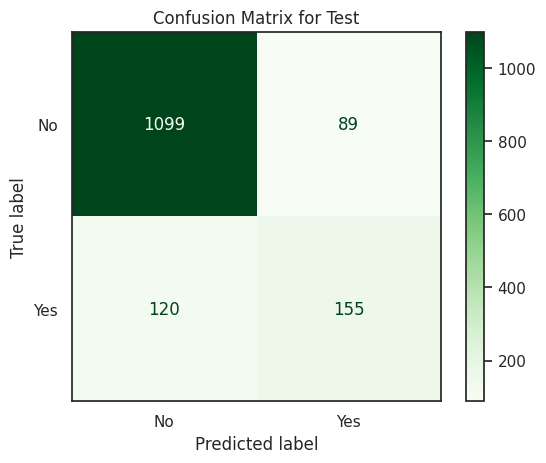

In [ ]:
# Let's check model performances for this model
scores_Sklearn_rf_tuned = get_metrics_score(rf_tuned,X_train,X_test,y_train,y_test,flag=True)

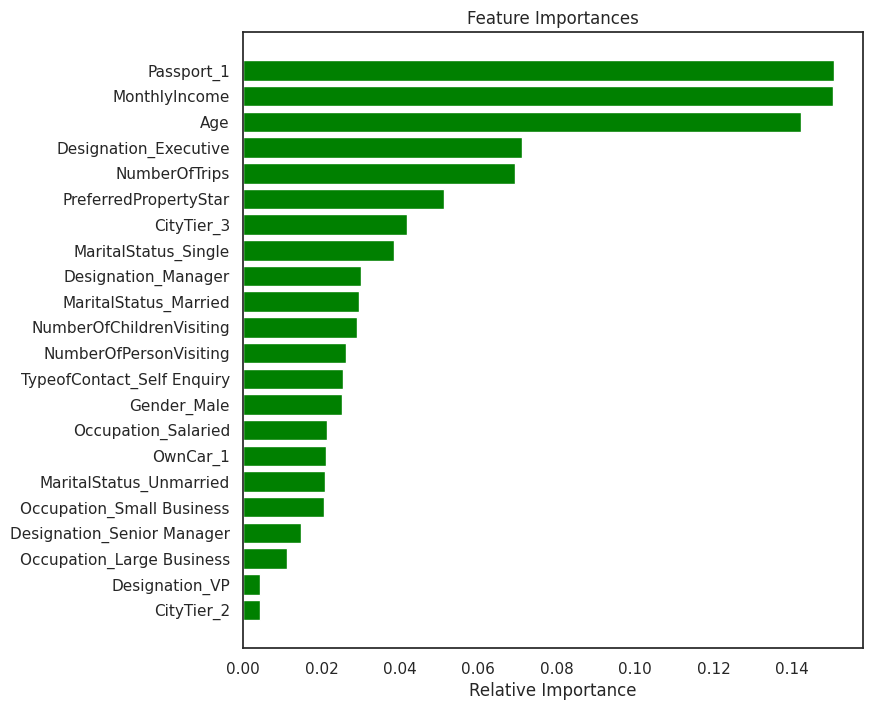

In [ ]:
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## **Gradient Boosting**

In [ ]:
gb=GradientBoostingClassifier(random_state=1)
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

               Train_data  Test_data
Accuracy         0.878370   0.857143
Recall           0.455677   0.360000
Precision        0.818436   0.750000
F1 score         0.585415   0.486486
roc-auc-score    0.716000   0.666000


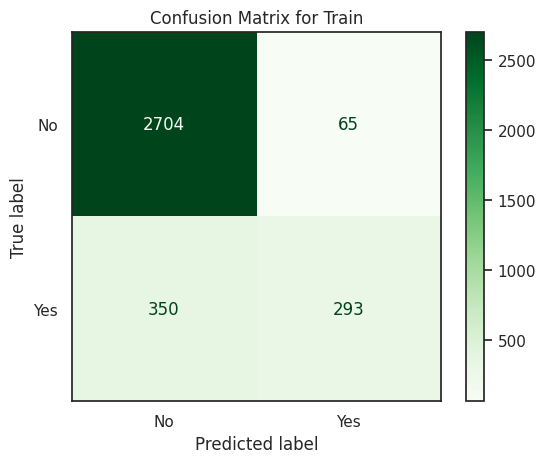

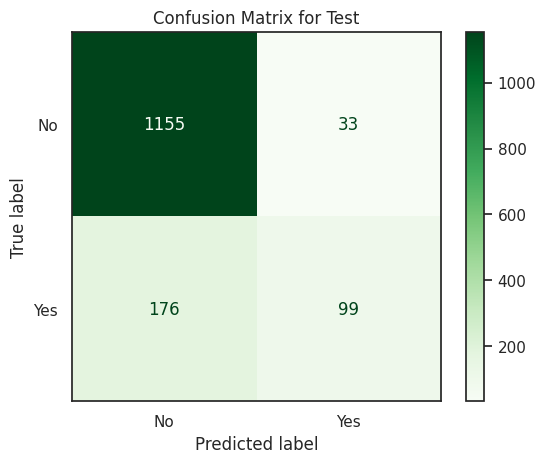

In [ ]:
# Let's check model performances for this model
scores_Sklearn_gb = get_metrics_score(gb,X_train,X_test,y_train,y_test,flag=True)

**Tuned Gradient Boosting Classifier**

In [ ]:
gb_tuned=GradientBoostingClassifier(random_state=1)
parameters={
    'n_estimators':[100,200,300,400],
    'subsample':[0.8,1],
    'max_features':[0.7,0.8,0.9,1]
}

grid=GridSearchCV(estimator=gb_tuned,param_grid=parameters,scoring='accuracy',cv=5)
grid=grid.fit(X_train,y_train)
gb_tuned=grid.best_estimator_
gb_tuned.fit(X_train,y_train)

GradientBoostingClassifier(max_features=0.8, n_estimators=400, random_state=1,
                           subsample=1)

               Train_data  Test_data
Accuracy         0.933763   0.871497
Recall           0.688958   0.458182
Precision        0.944563   0.763636
F1 score         0.796763   0.572727
roc-auc-score    0.840000   0.713000


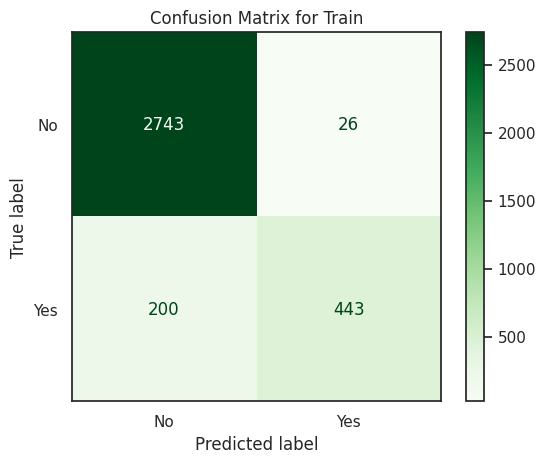

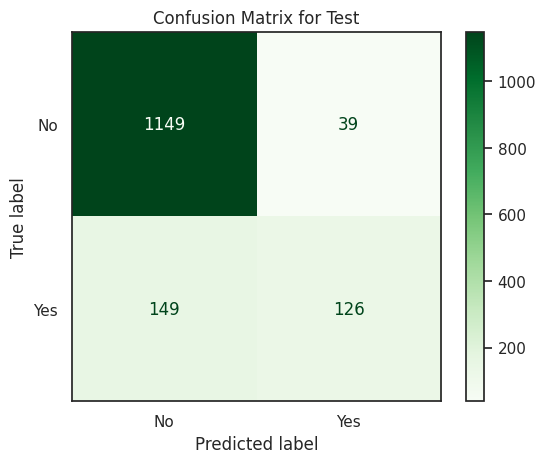

In [ ]:
# Let's check model performances for this model
scores_Sklearn_gb_tuned = get_metrics_score(gb_tuned,X_train,X_test,y_train,y_test,flag=True)

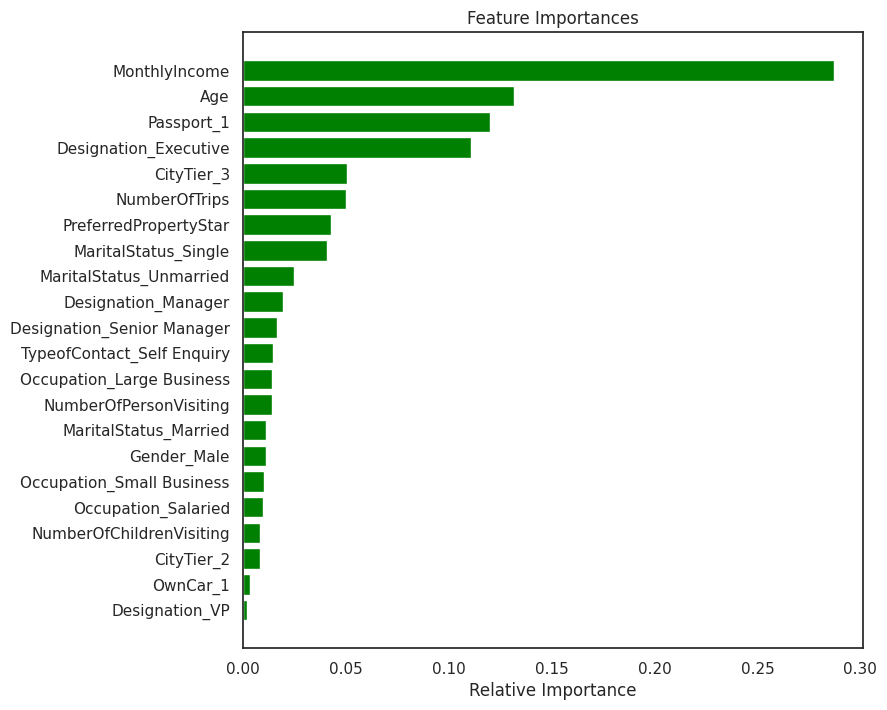

In [ ]:
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## **AdaBoost**

In [ ]:
adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

               Train_data  Test_data
Accuracy         0.843787   0.840738
Recall           0.295490   0.247273
Precision        0.703704   0.723404
F1 score         0.416210   0.368564
roc-auc-score    0.633000   0.613000


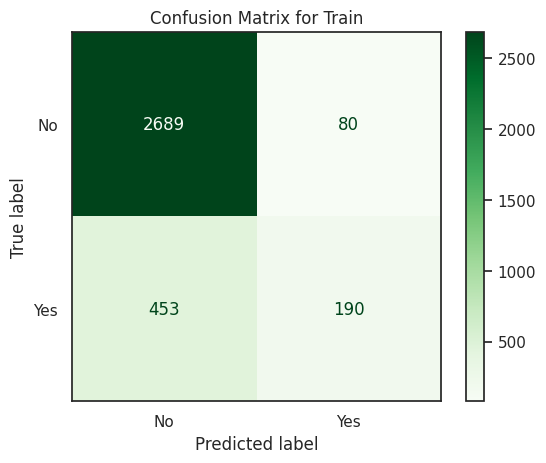

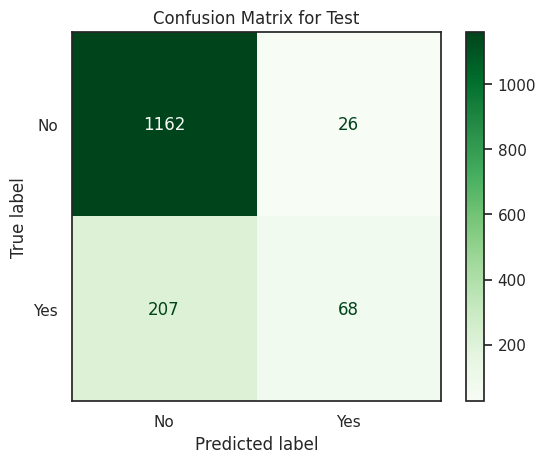

In [ ]:
# Let's check model performances for this model
scores_Sklearn_adaboost = get_metrics_score(adaboost,X_train,X_test,y_train,y_test,flag=True)

**Tuned Adaboost Classifier**

In [ ]:
adb_tuned=AdaBoostClassifier(random_state=1)
parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2)],
    "n_estimators": np.arange(10,50,100),
    "learning_rate":np.arange(0.1,1,0.1)
}

In [ ]:
grid=GridSearchCV(estimator=adb_tuned,param_grid=parameters,scoring='accuracy',cv=5)
grid=grid.fit(X_train,y_train)
adb_tuned=grid.best_estimator_
adb_tuned.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.7000000000000001, n_estimators=10,
                   random_state=1)

               Train_data  Test_data
Accuracy         0.847011   0.844839
Recall           0.312597   0.287273
Precision        0.715302   0.718182
F1 score         0.435065   0.410390
roc-auc-score    0.642000   0.631000


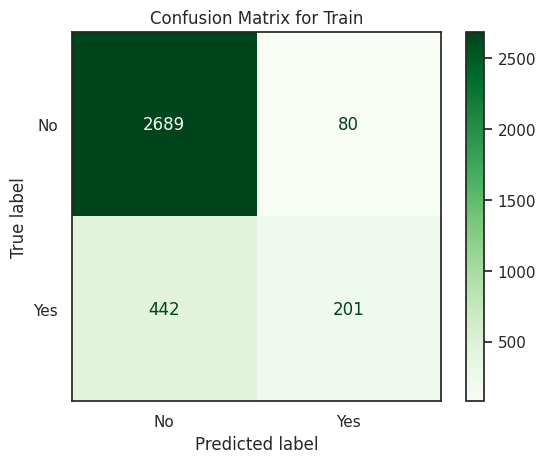

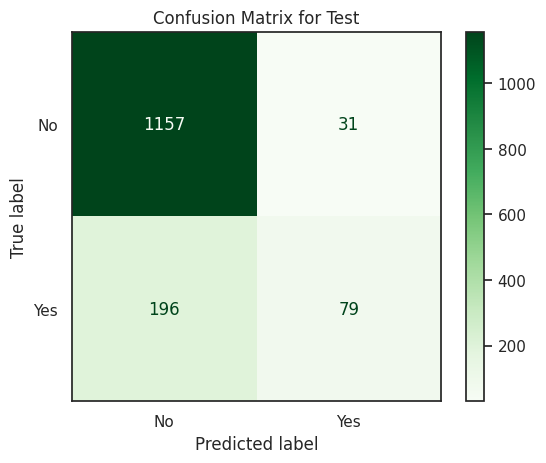

In [ ]:
# Let's check model performances for this model
scores_Sklearn_abd_tuned = get_metrics_score(adb_tuned,X_train,X_test,y_train,y_test,flag=True)

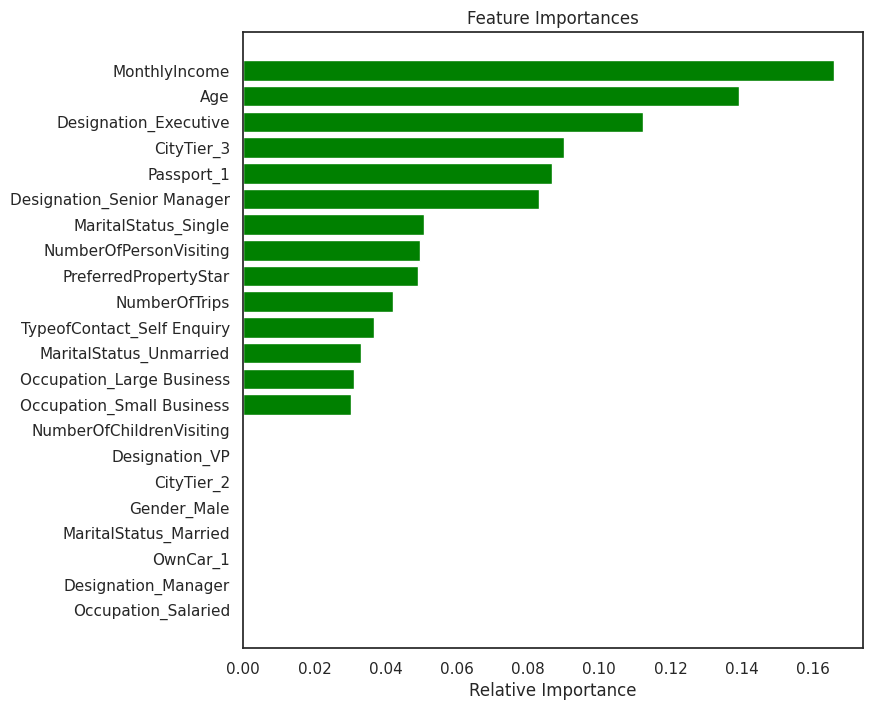

In [ ]:
importances = adb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
Data = [scores_Sklearn_rf, scores_Sklearn_rf_tuned, scores_Sklearn_gb, scores_Sklearn_gb_tuned, scores_Sklearn_adaboost, scores_Sklearn_abd_tuned]

comparison_frame = pd.DataFrame(data=Data,
                                index=['Random Forest', 'Tuned Random Forest', 'Gradient Boosting', 'Tuned Gradient Boosting', 'Adaboost', 'Tuned Adaboost'],
                                columns=['Train_accuracy', 'Test_accuracy', 'Train_recall', 'Test_recall', 'Train_precision', 'Test_precision', 'Train_f1', 'Test_f1'])


In [ ]:
comparison_frame

,Train_accuracy,Test_accuracy,Train_recall,Test_recall,Train_precision,Test_precision,Train_f1,Test_f1
Random Forest,1.000000,0.893370,1.000000,0.483636,1.000000,0.904762,1.000000,0.630332
Tuned Random Forest,0.901817,0.857143,0.729393,0.563636,0.744444,0.635246,0.736842,0.597303
Gradient Boosting,0.878370,0.857143,0.455677,0.360000,0.818436,0.750000,0.585415,0.486486
Tuned Gradient Boosting,0.933763,0.871497,0.688958,0.458182,0.944563,0.763636,0.796763,0.572727
Adaboost,0.843787,0.840738,0.295490,0.247273,0.703704,0.723404,0.416210,0.368564
Tuned Adaboost,0.847011,0.844839,0.312597,0.287273,0.715302,0.718182,0.435065,0.410390


# **Conclusion**

Tuned Gradient Boosting is performing good on train as well as test data.
